### Parameters
B = 1500 / sec

**Collocation** golovin_precip_inject.jl
```

    # Physical parameters: Kernel
    a = 0.0
    b = 1500 * 1e-12
    c = 0.0
    kernel_func = x -> a + b*(x[1]+x[2]) + c*abs(x[1]^(2/3)-x[2]^(2/3))/vmax^(2/3)*(x[1]^(1/3)+x[2]^(1/3))^2
    tracked_moments = [1.0]
    inject_rate = 1
    N     = 0             # initial droplet density: number per cm^3
    θ_v   = 1000           # volume scale factor: µm
    θ_v_in= 1000            # volume scale factor: μm
    θ_r   = 3             # radius scale factor: µm
    k     = 3             # shape factor for particle size distribution 
    ρ_w   = 1.0e-12       # density of droplets: 1 g/µm^3

    # initial/injection distribution in volume: gamma distribution in radius, number per cm^3
    r = v->(3/4/pi*v)^(1/3)
    #n_v_init = v -> N*(r(v))^(k-1)/θ_r^k * exp(-r(v)/θ_r) / gamma(k)
    n_v_init = v -> N*v^(k-1)/θ_v^k * exp(-v/θ_v) / gamma(k)
```
    

**Bott**
```
10.,2.879,0.01,1,2,14400.,9.847,1.0,2.2854

cck(j,i)=1.5d-6*(e(j)+e(i))
```

In [30]:
import numpy as np
from matplotlib import pyplot
from PySDM.physics.constants import si

In [31]:
class Settings:

    def __init__(self):
        self.radius_bins_edges = np.logspace(np.log10(1 * si.um), np.log10(1000 * si.um), num=128, endpoint=True)
        self.volume_bins_edges = self.radius_bins_edges**3 * 4 * np.pi / 3

    @property
    def output_steps(self):
        return [int(step/self.dt) for step in self._steps]

In [32]:
settings = Settings()
r_cutoff = 25
v_cutoff = 4/3*np.pi*r_cutoff**3

## Bin

In [33]:
#golovin_sourcesink_n32
#Tmax, nbin, dt, scal, emin, rhow, B, k1, theta, N0 
#[7200.0, 32, 5.0, 1, 7.091336e-10, 1e-09, 1.5e-09, 3, 100, 0]

v_grid = [1.06370040e+00, 2.12740080e+00, 4.25480160e+00, 8.50960320e+00,
 1.70192064e+01, 3.40384128e+01, 6.80768256e+01, 1.36153651e+02,
 2.72307302e+02, 5.44614605e+02, 1.08922921e+03, 2.17845842e+03,
 4.35691684e+03, 8.71383368e+03, 1.74276674e+04, 3.48553347e+04,
 6.97106694e+04, 1.39421339e+05, 2.78842678e+05, 5.57685355e+05,
 1.11537071e+06, 2.23074142e+06, 4.46148284e+06, 8.92296569e+06,
 1.78459314e+07, 3.56918627e+07, 7.13837255e+07, 1.42767451e+08,
 2.85534902e+08, 5.71069804e+08, 1.14213961e+09, 2.28427922e+09]
r_grid = [6.33252487e-01, 7.97848139e-01, 1.00522566e+00, 1.26650497e+00,
 1.59569628e+00, 2.01045133e+00, 2.53300995e+00, 3.19139256e+00,
 4.02090266e+00, 5.06601990e+00, 6.38278511e+00, 8.04180532e+00,
 1.01320398e+01, 1.27655702e+01, 1.60836106e+01, 2.02640796e+01,
 2.55311404e+01, 3.21672213e+01, 4.05281592e+01, 5.10622809e+01,
 6.43344425e+01, 8.10563184e+01, 1.02124562e+02, 1.28668885e+02,
 1.62112637e+02, 2.04249124e+02, 2.57337770e+02, 3.24225274e+02,
 4.08498247e+02, 5.14675540e+02, 6.48450547e+02, 8.16996494e+02]

gr0 = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]
gr18 = [8.57119372e-002, 6.81364288e-001, 5.38159285e+000, 4.19649263e+001,
 3.18977478e+002, 2.30399146e+003, 1.50391537e+004, 8.06014790e+004,
 3.01535838e+005, 6.42995212e+005, 7.05433711e+005, 6.17513059e+005,
 5.66631296e+005, 3.94385544e+004, 1.83372184e-028, 9.81768732e-066,
 6.74450544e-141, 7.34541150e-292, 0.00000000e+000, 0.00000000e+000,
 0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
 0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
 0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000]
gr72 = [7.87797785e-002, 6.26113860e-001, 4.94282290e+000, 3.85068572e+001,
 2.92155335e+002, 2.10304276e+003, 1.36473193e+004, 7.25502908e+004,
 2.69364605e+005, 5.63885549e+005, 5.87586922e+005, 3.72356060e+005,
 1.07072152e+006, 1.19131273e+005, 2.05688867e-028, 1.11580722e-065,
 7.85787253e-141, 9.12241708e-292, 0.00000000e+000, 0.00000000e+000,
 0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
 0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
 0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000]
t_bott = [   0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,  900.,
 1000., 1100., 1200., 1300., 1400., 1500., 1600., 1700., 1800., 1900.,
 2000., 2100., 2200., 2300., 2400., 2500., 2600., 2700., 2800., 2900.,
 3000., 3100., 3200., 3300., 3400., 3500., 3600., 3700., 3800., 3900.,
 4000., 4100., 4200., 4300., 4400., 4500., 4600., 4700., 4800., 4900.,
 5000., 5100., 5200., 5300., 5400., 5500., 5600., 5700., 5800., 5900.,
 6000., 6100., 6200., 6300., 6400., 6500., 6600., 6700., 6800., 6900.,
 7000., 7100., 7200.]
M0_bott = [  0.        ,  99.78583712, 198.38633547, 294.66601511, 387.53301833,
 475.96274414, 559.02053944, 635.88209678, 705.85076056, 768.37134329,
 823.04047775, 869.61406709, 908.01291802, 938.32782585, 960.82480636,
 975.949568  , 984.32788046, 986.75616237, 984.17600842, 977.62902693,
 968.19426048, 956.91723803, 944.74371183, 932.47005864, 920.71693461,
 909.92609068, 900.37524932, 892.20388687, 885.4432309 , 880.04557665,
 875.91006439, 872.90372192, 870.8776754 , 869.67902661, 869.15913412,
 869.17906202, 869.61288138, 870.34939182, 871.29271074, 872.3620723 ,
 873.4910922 , 874.6266877 , 875.72779189, 876.76396402, 877.71397023,
 878.56438856, 879.30827728, 879.94393364, 880.47376135, 880.90325797,
 881.24012736, 881.49351793, 881.67338342, 881.78996009, 881.8533518 ,
 881.87321302, 881.85851857, 881.81740875, 881.75709812, 881.68383686,
 881.60291423, 881.51869438, 881.43467599, 881.35356826, 881.27737688,
 881.2074946 , 881.14479233, 881.08970747, 881.0423269 , 881.00246317,
 880.96972266, 880.94356534, 880.92335582]
M1_bott = [     0.        ,  40010.97371706,  80021.94732869, 120032.91821039,
 160043.8606097 , 200054.62449518, 240064.57736926, 280071.5781291 ,
 320069.45422952, 360042.5208775 , 399954.94355373, 439732.32658936,
 479233.67820072, 518214.9921258 , 556291.69610899, 592914.78963377,
 627380.27245666, 658887.39831256, 686645.31798085, 710005.01228453,
 728577.08026346, 742297.78200084, 751425.94859425, 756479.70866767,
 758139.83890972, 757149.51440287, 754231.81485751, 750034.26235778,
 745099.91701887, 739859.30157997, 734636.0363292 , 729659.93103478,
 725082.98227411, 720995.41289043, 717440.21010961, 714425.51099148,
 711934.71931143, 709934.52009267, 708381.07905176, 707224.74232652,
 706413.53210122, 705895.69353894, 705621.50316604, 705544.50634331,
 705622.31504335, 705817.06769134, 706095.62990785, 706429.59764895,
 706795.15134009, 707172.80005836, 707547.04769177, 707906.0075344 ,
 708240.98739215, 708546.0635735 , 708817.65886624, 709054.13661079,
 709255.42021125, 709422.64486875, 709557.84599669, 709663.68671692,
 709743.22506537, 709799.72007428, 709836.4747479 , 709856.71309984,
 709863.48784814, 709859.61503909, 709847.63175267, 709829.7730932 ,
 709807.96484905, 709783.82847738, 709758.69540388, 709733.62799384,
 709709.44492858]
M2_bott = [0.00000000e+00, 2.41244015e+07, 4.87990052e+07, 7.45961331e+07,
 1.02154049e+08, 1.32207731e+08, 1.65622940e+08, 2.03433392e+08,
 2.46875263e+08, 2.97405060e+08, 3.56676525e+08, 4.26442766e+08,
 5.08348751e+08, 6.03596760e+08, 7.12510843e+08, 8.34091168e+08,
 9.65709804e+08, 1.10311331e+09, 1.24082800e+09, 1.37291902e+09,
 1.49390172e+09, 1.59953484e+09, 1.68728260e+09, 1.75637741e+09,
 1.80755767e+09, 1.84263012e+09, 1.86400357e+09, 1.87429230e+09,
 1.87603088e+09, 1.87150083e+09, 1.86264762e+09, 1.85106079e+09,
 1.83799252e+09, 1.82439614e+09, 1.81097189e+09, 1.79821276e+09,
 1.78644629e+09, 1.77587074e+09, 1.76658530e+09, 1.75861488e+09,
 1.75192996e+09, 1.74646241e+09, 1.74211811e+09, 1.73878669e+09,
 1.73634931e+09, 1.73468458e+09, 1.73367311e+09, 1.73320095e+09,
 1.73316198e+09, 1.73345960e+09, 1.73400775e+09, 1.73473134e+09,
 1.73556630e+09, 1.73645920e+09, 1.73736673e+09, 1.73825482e+09,
 1.73909777e+09, 1.73987723e+09, 1.74058115e+09, 1.74120279e+09,
 1.74173975e+09, 1.74219306e+09, 1.74256636e+09, 1.74286521e+09,
 1.74309641e+09, 1.74326754e+09, 1.74338648e+09, 1.74346109e+09,
 1.74349893e+09, 1.74350711e+09, 1.74349209e+09, 1.74345966e+09,
 1.74341487e+09]
mprecip_bin = [0.00000000e+000, 3.95624218e-291, 1.92846587e-291, 1.08081196e-291,
 7.40839697e-292, 5.53470060e-292, 4.35787746e-292, 3.56456620e-292,
 3.00640234e-292, 2.60340084e-292, 2.30848677e-292, 2.09214033e-292,
 1.93494216e-292, 1.82361962e-292, 1.74878617e-292, 1.70355693e-292,
 1.68264658e-292, 1.68175545e-292, 1.69715042e-292, 1.72539829e-292,
 1.76322901e-292, 1.80750826e-292, 1.85529045e-292, 1.90391558e-292,
 1.95111235e-292, 1.99507660e-292, 2.03450758e-292, 2.06859802e-292,
 2.09698529e-292, 2.11967665e-292, 2.13696256e-292, 2.14933034e-292,
 2.15738631e-292, 2.16179121e-292, 2.16321035e-292, 2.16227793e-292,
 2.15957375e-292, 2.15560987e-292, 2.15082493e-292, 2.14558397e-292,
 2.14018193e-292, 2.13484948e-292, 2.12976005e-292, 2.12503745e-292,
 2.12076339e-292, 2.11698474e-292, 2.11372019e-292, 2.11096626e-292,
 2.10870268e-292, 2.10689693e-292, 2.10550821e-292, 2.10449075e-292,
 2.10379645e-292, 2.10337706e-292, 2.10318585e-292, 2.10317883e-292,
 2.10331560e-292, 2.10355996e-292, 2.10388013e-292, 2.10424889e-292,
 2.10464343e-292, 2.10504516e-292, 2.10543939e-292, 2.10581493e-292,
 2.10616374e-292, 2.10648042e-292, 2.10676186e-292, 2.10700679e-292,
 2.10721546e-292, 2.10738922e-292, 2.10753029e-292, 2.10764147e-292,
 2.10772589e-292]


In [34]:
r_grid = np.array(r_grid)
r_grid = np.insert(r_grid, 0, 0.0)
v_grid_plt = np.array(v_grid)*np.sqrt(2)
r_grid_plt = (v_grid_plt / 4 / np.pi * 3)**(1/3)

In [35]:
#golovin_sourcesink_n64
# Tmax, nbin, dt, scal, emin, rhow, B, k1, theta, N0 
#[7200.0, 64, 10.0, 2, 7.091336e-10, 1e-09, 1.5e-09, 3, 100, 0]

v_grid_HR = [8.55999977e-01, 1.21056678e+00, 1.71199995e+00, 2.42113355e+00,
 3.42399991e+00, 4.84226711e+00, 6.84799982e+00, 9.68453422e+00,
 1.36959996e+01, 1.93690684e+01, 2.73919993e+01, 3.87381369e+01,
 5.47839985e+01, 7.74762737e+01, 1.09567997e+02, 1.54952547e+02,
 2.19135994e+02, 3.09905095e+02, 4.38271988e+02, 6.19810190e+02,
 8.76543977e+02, 1.23962038e+03, 1.75308795e+03, 2.47924076e+03,
 3.50617591e+03, 4.95848152e+03, 7.01235181e+03, 9.91696304e+03,
 1.40247036e+04, 1.98339261e+04, 2.80494073e+04, 3.96678522e+04,
 5.60988145e+04, 7.93357043e+04, 1.12197629e+05, 1.58671409e+05,
 2.24395258e+05, 3.17342817e+05, 4.48790516e+05, 6.34685635e+05,
 8.97581032e+05, 1.26937127e+06, 1.79516206e+06, 2.53874254e+06,
 3.59032413e+06, 5.07748508e+06, 7.18064826e+06, 1.01549702e+07,
 1.43612965e+07, 2.03099403e+07, 2.87225930e+07, 4.06198806e+07,
 5.74451861e+07, 8.12397612e+07, 1.14890372e+08, 1.62479522e+08,
 2.29780744e+08, 3.24959045e+08, 4.59561488e+08, 6.49918090e+08,
 9.19122977e+08, 1.29983618e+09, 1.83824595e+09, 2.59967236e+09]
r_grid_HR = [5.89017748e-01, 6.61150068e-01, 7.42115860e-01, 8.32996888e-01,
 9.35007394e-01, 1.04951031e+00, 1.17803550e+00, 1.32230014e+00,
 1.48423172e+00, 1.66599378e+00, 1.87001479e+00, 2.09902063e+00,
 2.35607099e+00, 2.64460027e+00, 2.96846344e+00, 3.33198755e+00,
 3.74002957e+00, 4.19804126e+00, 4.71214199e+00, 5.28920055e+00,
 5.93692688e+00, 6.66397511e+00, 7.48005915e+00, 8.39608251e+00,
 9.42428398e+00, 1.05784011e+01, 1.18738538e+01, 1.33279502e+01,
 1.49601183e+01, 1.67921650e+01, 1.88485680e+01, 2.11568022e+01,
 2.37477075e+01, 2.66559004e+01, 2.99202366e+01, 3.35843301e+01,
 3.76971359e+01, 4.23136044e+01, 4.74954150e+01, 5.33118009e+01,
 5.98404732e+01, 6.71686601e+01, 7.53942718e+01, 8.46272088e+01,
 9.49908301e+01, 1.06623602e+02, 1.19680946e+02, 1.34337320e+02,
 1.50788544e+02, 1.69254418e+02, 1.89981660e+02, 2.13247203e+02,
 2.39361893e+02, 2.68674640e+02, 3.01577087e+02, 3.38508835e+02,
 3.79963320e+02, 4.26494407e+02, 4.78723786e+02, 5.37349281e+02,
 6.03154174e+02, 6.77017670e+02, 7.59926641e+02, 8.52988814e+02]

gr0HR = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]
gr18HR = [4.54826863e-002, 1.28375741e-001, 3.62013736e-001, 1.01959459e+000,
 2.86659903e+000, 8.03946986e+000, 2.24678915e+001, 6.24799199e+001,
 1.72532151e+002, 4.71728112e+002, 1.27183086e+003, 3.36187905e+003,
 8.64254756e+003, 2.13658654e+004, 5.00147245e+004, 1.08586100e+005,
 2.12965461e+005, 3.66085160e+005, 5.36321332e+005, 6.60305122e+005,
 6.94580321e+005, 6.64347006e+005, 6.27819865e+005, 5.96289690e+005,
 5.44568005e+005, 4.58295393e+005, 3.32903666e+005, 2.41218865e+005,
 1.89320854e+004, 1.36934925e-033, 3.71937416e-051, 3.97020612e-076,
 1.42239107e-111, 7.78316464e-162, 4.65237666e-233, 0.00000000e+000,
 0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
 0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
 0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
 0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
 0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
 0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
 0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000]
gr72HR = [4.04939517e-002, 1.14288787e-001, 3.22262344e-001, 9.07530228e-001,
 2.55110807e+000, 7.15300781e+000, 1.99840163e+001, 5.55475203e+001,
 1.53293072e+002, 4.18766091e+002, 1.12772903e+003, 2.97638436e+003,
 7.63643122e+003, 1.88330980e+004, 4.39667893e+004, 9.52063889e+004,
 1.86362435e+005, 3.19974517e+005, 4.67336869e+005, 5.67739287e+005,
 5.75895237e+005, 5.18762081e+005, 4.66958569e+005, 4.54194061e+005,
 4.44851404e+005, 5.46638658e+005, 3.83580020e+005, 1.29210672e+006,
 9.77392262e+004, 1.59575427e-033, 4.38828852e-051, 4.76426947e-076,
 1.75023730e-111, 9.96286683e-162, 6.36144298e-233, 0.00000000e+000,
 0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
 0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
 0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
 0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
 0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
 0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
 0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000]
t_bott_HR = [   0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,  900.,
 1000., 1100., 1200., 1300., 1400., 1500., 1600., 1700., 1800., 1900.,
 2000., 2100., 2200., 2300., 2400., 2500., 2600., 2700., 2800., 2900.,
 3000., 3100., 3200., 3300., 3400., 3500., 3600., 3700., 3800., 3900.,
 4000., 4100., 4200., 4300., 4400., 4500., 4600., 4700., 4800., 4900.,
 5000., 5100., 5200., 5300., 5400., 5500., 5600., 5700., 5800., 5900.,
 6000., 6100., 6200., 6300., 6400., 6500., 6600., 6700., 6800., 6900.,
 7000., 7100., 7200.]
M0_bott_HR = [  0.        ,  99.77080732, 198.30023735, 294.43254404, 387.06439439,
 475.17004339, 557.82436977, 634.22275941, 703.69701893, 765.7267485 ,
 819.94585979, 866.14420074, 904.26458639, 934.39610262, 956.76563123,
 971.731051  , 979.78084686, 981.54305163, 977.79944217, 969.49083735,
 957.69442818, 943.5623765 , 928.2300915 , 912.7193152 , 897.86347662,
 884.27103021, 872.32662855, 862.21926518, 853.98365537, 847.54367766,
 842.75110021, 839.41670571, 837.33347993, 836.29282818, 836.09523504,
 836.5567691 , 837.51262125, 838.81860286, 840.35128756, 842.00728337,
 843.70197213, 845.3679449 , 846.95328518, 848.41979989, 849.74126215,
 850.90170744, 851.8938093 , 852.71735206, 853.3778122 , 853.88505684,
 854.25216571, 854.49438121, 854.62818967, 854.670535  , 854.63816364,
 854.54709745, 854.41222865, 854.24702832, 854.06335814, 853.87137316,
 853.67950244, 853.49449379, 853.32150899, 853.16425652, 853.02514958,
 852.905479  , 852.80559164, 852.72506671, 852.66288427, 852.61758108,
 852.58739098, 852.57036784, 852.56449007]
M1_bott_HR = [     0.        ,  39999.99972569,  79999.99945138, 119999.99917707,
 159999.99890257, 199999.9986225 , 239999.99824517, 279999.99667877,
 319999.98408178, 359999.89002062, 399999.30192401, 439996.20812272,
 479982.37931615, 519929.51073395, 559756.03651387, 599263.56978631,
 638045.3121771 , 675400.03978995, 710316.0421203 , 741583.73569938,
 768033.64846242, 788814.13659041, 803589.24796268, 812581.80450884,
 816470.2381121 , 816206.78533599, 812832.15227092, 807334.14887116,
 800564.33347378, 793204.72950256, 785768.49335806, 778619.10707996,
 771996.87301556, 766045.92639782, 760838.36011333, 756394.2040943 ,
 752697.1841703 , 749706.73587291, 747366.93522234, 745613.00881594,
 744376.00463445, 743586.09909347, 743174.91196004, 743077.10978688,
 743231.50346739, 743581.78585257, 744077.00933626, 744671.86894331,
 745326.83192731, 746008.13856398, 746687.68918803, 747342.82808058,
 747956.03410841, 748514.529642  , 749009.8219669 , 749437.1941062 ,
 749795.16392644, 750084.93116051, 750309.83139874, 750474.81427351,
 750585.96026221, 750650.04711766, 750674.17327806, 750665.4420448 ,
 750630.70710407, 750576.37727927, 750508.27631852, 750431.55205844,
 750350.62841812, 750269.19328937, 750190.21540613, 750115.98359878,
 750048.16237659]
M2_bott_HR = [0.00000000e+00, 2.41079445e+07, 4.88117911e+07, 7.47117938e+07,
 1.02471313e+08, 1.32850760e+08, 1.66748266e+08, 2.05250710e+08,
 2.49699699e+08, 3.01777913e+08, 3.63621107e+08, 4.37954600e+08,
 5.28228374e+08, 6.38663308e+08, 7.74024138e+08, 9.38855811e+08,
 1.13601347e+09, 1.36472578e+09, 1.61899558e+09, 1.88739454e+09,
 2.15480032e+09, 2.40555656e+09, 2.62672276e+09, 2.81015449e+09,
 2.95293958e+09, 3.05653018e+09, 3.12527172e+09, 3.16493976e+09,
 3.18161467e+09, 3.18097208e+09, 3.16792574e+09, 3.14651440e+09,
 3.11993211e+09, 3.09062851e+09, 3.06043269e+09, 3.03067500e+09,
 3.00229468e+09, 2.97592926e+09, 2.95198601e+09, 2.93069737e+09,
 2.91216331e+09, 2.89638343e+09, 2.88328117e+09, 2.87272241e+09,
 2.86453006e+09, 2.85849580e+09, 2.85439003e+09, 2.85197056e+09,
 2.85099025e+09, 2.85120396e+09, 2.85237464e+09, 2.85427860e+09,
 2.85670981e+09, 2.85948325e+09, 2.86243715e+09, 2.86543420e+09,
 2.86836179e+09, 2.87113136e+09, 2.87367703e+09, 2.87595362e+09,
 2.87793432e+09, 2.87960808e+09, 2.88097690e+09, 2.88205323e+09,
 2.88285740e+09, 2.88341533e+09, 2.88375650e+09, 2.88391215e+09,
 2.88391380e+09, 2.88379211e+09, 2.88357596e+09, 2.88329176e+09,
 2.88296303e+09]
mprecip_bin_HR = [0.00000000e+000, 1.45950526e-161, 1.06180930e-161, 5.89979147e-162,
 3.90096641e-162, 2.89218748e-162, 2.27782641e-162, 1.86895113e-162,
 1.58289494e-162, 1.37662696e-162, 1.22534252e-162, 1.11371602e-162,
 1.03179436e-162, 9.72871954e-163, 9.32303846e-163, 9.06795410e-163,
 8.93942709e-163, 8.91904675e-163, 8.99146438e-163, 9.14233307e-163,
 9.35683245e-163, 9.61896660e-163, 9.91172292e-163, 1.02179480e-162,
 1.05215909e-162, 1.08089030e-162, 1.10692841e-162, 1.12956343e-162,
 1.14842414e-162, 1.16343279e-162, 1.17474160e-162, 1.18266471e-162,
 1.18761546e-162, 1.19005404e-162, 1.19044770e-162, 1.18924271e-162,
 1.18684664e-162, 1.18361860e-162, 1.17986543e-162, 1.17584196e-162,
 1.17175383e-162, 1.16776187e-162, 1.16398708e-162, 1.16051596e-162,
 1.15740563e-162, 1.15468862e-162, 1.15237732e-162, 1.15046799e-162,
 1.14894425e-162, 1.14778027e-162, 1.14694346e-162, 1.14639687e-162,
 1.14610122e-162, 1.14601658e-162, 1.14610378e-162, 1.14632555e-162,
 1.14664738e-162, 1.14703812e-162, 1.14747037e-162, 1.14792071e-162,
 1.14836971e-162, 1.14880183e-162, 1.14920520e-162, 1.14957132e-162,
 1.14989469e-162, 1.15017239e-162, 1.15040372e-162, 1.15058975e-162,
 1.15073293e-162, 1.15083674e-162, 1.15090535e-162, 1.15094336e-162,
 1.15095551e-162]


In [36]:
r_grid_HR = np.array(r_grid_HR)
r_grid_HR = np.insert(r_grid_HR, 0, 0.0)
v_grid_pltHR = np.array(v_grid_HR)*(2**(1/16))
r_grid_pltHR = (v_grid_pltHR / 4 / np.pi * 3)**(1/3)

# Cloudy

In [37]:
# import rbf from julia setup
from scipy.stats import norm
from scipy.stats import gamma

def cslogrbf1(x, mean, stddev):
    r = abs((np.log(x)-mean)/stddev)
    cslogr = np.zeros(len(x))
    for (i, ri) in enumerate(r):
        if (ri < 1):
            cslogr[i] = 12/35*(1-ri)**4 * (4+16*ri+12*ri**2+3*ri**3)/x[i]/stddev
    return cslogr

def rbf_basis(x, constants, means, stddev, v_cutoff):
    N = len(means)
    assert (len(stddev) == N)
    assert (len(constants) == N)
    pdf_result = 0
    
    for i in range(N):
        pdf_result += constants[i]*cslogrbf1(x, means[i], stddev[i])
    
    for i in range(len(x)):
        if x[i] > v_cutoff:
            pdf_result[i] = 0.0

    return pdf_result

def rbf8_i(x):
    means = [3.511853499981017, 5.485497865404485, 7.459142230827953, 9.43278659625142, 11.40643096167489, 13.380075327098357, 15.353719692521825, 17.327364057945292]
    stddevs = [5.485497865404485, 5.485497865404485, 3.947288730846936, 3.9472887308469353, 3.947288730846936, 3.947288730846937, 3.9472887308469353, 3.9472887308469353]
    c_init = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
    return rbf_basis(x, c_init, means, stddevs)

def rbf8_f(x):
    means = [3.511853499981017, 5.485497865404485, 7.459142230827953, 9.43278659625142, 11.40643096167489, 13.380075327098357, 15.353719692521825, 17.327364057945292]
    stddevs = [5.485497865404485, 5.485497865404485, 3.947288730846936, 3.9472887308469353, 3.947288730846936, 3.947288730846937, 3.9472887308469353, 3.9472887308469353]
    c_final = [194.91694975337717, 317.65932344687786, 9.683835156501157, 45.18947700502104, 0.0, 0.0, 0.0, 0.0]
    return rbf_basis(x, c_final, means, stddevs, v_cutoff)

def rbf16_i(x):
    means = [3.511853499981017, 4.432887537178635, 5.353921574376254, 6.274955611573872, 7.195989648771491, 8.117023685969109, 9.038057723166727, 9.959091760364345, 10.880125797561965, 11.801159834759583, 12.7221938719572, 13.643227909154819, 14.564261946352437, 15.485295983550056, 16.406330020747674, 17.327364057945292]
    stddevs = [4.432887537178635, 4.432887537178635, 1.842068074395237, 1.842068074395237, 1.842068074395237, 1.842068074395237, 1.842068074395236, 1.842068074395236, 1.8420680743952378, 1.8420680743952378, 1.842068074395236, 1.842068074395236, 1.842068074395236, 1.8420680743952378, 1.8420680743952378, 1.842068074395236]
    c_init = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
    return rbf_basis(x, c_init, means, stddevs)

def rbf16_f(x):
    means = [3.511853499981017, 4.432887537178635, 5.353921574376254, 6.274955611573872, 7.195989648771491, 8.117023685969109, 9.038057723166727, 9.959091760364345, 10.880125797561965, 11.801159834759583, 12.7221938719572, 13.643227909154819, 14.564261946352437, 15.485295983550056, 16.406330020747674, 17.327364057945292]
    stddevs = [4.432887537178635, 4.432887537178635, 1.842068074395237, 1.842068074395237, 1.842068074395237, 1.842068074395237, 1.842068074395236, 1.842068074395236, 1.8420680743952378, 1.8420680743952378, 1.842068074395236, 1.842068074395236, 1.842068074395236, 1.8420680743952378, 1.8420680743952378, 1.842068074395236]
    c_final = [61.00970102332095, 18.286731525265, 249.46612449610058, 280.2856051975206, 73.38442204282576, 19.663304867869485, 9.192915902378815, 0.0, 14.749501424486821, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
    return rbf_basis(x, c_final, means, stddevs, v_cutoff)

def rbf64_f(x):
    means = [3.511853499981017, 3.731147318361402, 3.9504411367417878, 4.1697349551221725, 4.389028773502559, 4.608322591882944, 4.827616410263329, 5.046910228643714, 5.266204047024099, 5.485497865404485, 5.70479168378487, 5.924085502165256, 6.143379320545641, 6.362673138926026, 6.5819669573064115, 6.801260775686797, 7.020554594067182, 7.239848412447567, 7.459142230827953, 7.678436049208338, 7.8977298675887235, 8.117023685969109, 8.336317504349495, 8.55561132272988, 8.774905141110265, 8.99419895949065, 9.213492777871036, 9.43278659625142, 9.652080414631806, 9.871374233012192, 10.090668051392576, 10.309961869772962, 10.529255688153347, 10.748549506533733, 10.967843324914117, 11.187137143294503, 11.40643096167489, 11.625724780055274, 11.84501859843566, 12.064312416816044, 12.28360623519643, 12.502900053576814, 12.7221938719572, 12.941487690337587, 13.160781508717971, 13.380075327098357, 13.599369145478741, 13.818662963859127, 14.037956782239512, 14.257250600619898, 14.476544419000284, 14.695838237380668, 14.915132055761054, 15.134425874141439, 15.353719692521825, 15.573013510902209, 15.792307329282595, 16.01160114766298, 16.230894966043365, 16.45018878442375, 16.669482602804138, 16.88877642118452, 17.108070239564906, 17.327364057945292]
    stddevs = [3.731147318361402, 3.731147318361402, 0.43858763676077084, 0.4385876367607704, 0.43858763676077084, 0.4385876367607713, 0.4385876367607704, 0.4385876367607704, 0.4385876367607704, 0.4385876367607704, 0.4385876367607704, 0.4385876367607713, 0.4385876367607713, 0.4385876367607704, 0.4385876367607704, 0.4385876367607704, 0.4385876367607704, 0.4385876367607704, 0.4385876367607713, 0.4385876367607713, 0.4385876367607704, 0.4385876367607704, 0.4385876367607713, 0.4385876367607704, 0.4385876367607704, 0.4385876367607704, 0.4385876367607704, 0.4385876367607704, 0.4385876367607704, 0.43858763676077217, 0.4385876367607704, 0.4385876367607704, 0.4385876367607704, 0.4385876367607704, 0.4385876367607704, 0.4385876367607704, 0.43858763676077217, 0.4385876367607704, 0.4385876367607704, 0.4385876367607704, 0.4385876367607704, 0.4385876367607704, 0.4385876367607704, 0.43858763676077217, 0.4385876367607704, 0.4385876367607704, 0.4385876367607704, 0.4385876367607704, 0.4385876367607704, 0.4385876367607704, 0.43858763676077217, 0.4385876367607704, 0.4385876367607704, 0.4385876367607704, 0.4385876367607704, 0.4385876367607704, 0.4385876367607704, 0.4385876367607704, 0.4385876367607704, 0.43858763676077217, 0.43858763676077217, 0.4385876367607686, 0.4385876367607686, 0.43858763676077217]
    c_final = [29.322821154778275, 35.9606232804519, 5.26895637727964, 8.944352425798222, 15.450388389701164, 23.327183009173453, 33.194230115597655, 44.58501950339966, 56.76350043388858, 68.293253050101, 77.22822803877675, 81.53237652708059, 79.86045519419824, 72.32299751984154, 60.704712277704104, 47.79863245912121, 36.16846823439526, 27.15957249358467, 20.788464311752804, 16.385884577012995, 13.256259458641162, 10.994864700036072, 9.022035436251738, 7.584966328419456, 5.853688156646976, 4.732627755115376, 3.1635131233614815, 1.932422482888258, 0.8296736187920708, 0.26404881521212886, 0.06674835158301351, 0.009636984825611868, 0.0016288800641141923, 0.0, 0.0020676475735252014, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
    return rbf_basis(x, c_final, means, stddevs, v_cutoff)

def rbf64_ss(x):
    # means = [3.511853499981017, 3.6301823880661597, 3.748511276151303, 3.8668401642364456, 3.9851690523215884, 4.103497940406731, 4.221826828491874, 4.3401557165770175, 4.45848460466216, 4.576813492747303, 4.695142380832446, 4.8134712689175885, 4.931800157002732, 5.050129045087874, 5.168457933173017, 5.28678682125816, 5.405115709343303, 5.523444597428446, 5.641773485513589, 5.760102373598731, 5.8784312616838745, 5.996760149769018, 6.11508903785416, 6.233417925939303, 6.351746814024446, 6.470075702109589, 6.588404590194732, 6.706733478279875, 6.825062366365017, 6.943391254450161, 7.061720142535304, 7.180049030620446, 7.298377918705589, 7.416706806790732, 7.535035694875875, 7.653364582961018, 7.77169347104616, 7.8900223591313035, 8.008351247216446, 8.126680135301589, 8.245009023386732, 8.363337911471875, 8.481666799557019, 8.59999568764216, 8.718324575727303, 8.836653463812446, 8.95498235189759, 9.073311239982733, 9.191640128067876, 9.309969016153017, 9.42829790423816, 9.546626792323304, 9.664955680408447, 9.78328456849359, 9.901613456578733, 10.019942344663875, 10.138271232749018, 10.256600120834161, 10.374929008919304, 10.493257897004447, 10.61158678508959, 10.729915673174732, 10.848244561259875, 10.966573449345018]
    # stddevs = [3.6301823880661597, 3.6301823880661597, 0.23665777617028594, 0.23665777617028594, 0.2366577761702855, 0.2366577761702855, 0.23665777617028594, 0.23665777617028638, 0.2366577761702855, 0.2366577761702855, 0.23665777617028638, 0.2366577761702855, 0.2366577761702855, 0.2366577761702855, 0.2366577761702855, 0.23665777617028638, 0.2366577761702855, 0.2366577761702855, 0.23665777617028638, 0.2366577761702855, 0.2366577761702855, 0.23665777617028638, 0.2366577761702855, 0.2366577761702855, 0.23665777617028638, 0.2366577761702855, 0.2366577761702855, 0.23665777617028638, 0.2366577761702855, 0.2366577761702855, 0.23665777617028638, 0.2366577761702855, 0.2366577761702855, 0.2366577761702855, 0.2366577761702855, 0.23665777617028638, 0.2366577761702855, 0.2366577761702855, 0.2366577761702855, 0.2366577761702855, 0.23665777617028638, 0.23665777617028638, 0.23665777617028638, 0.2366577761702846, 0.2366577761702846, 0.23665777617028638, 0.23665777617028638, 0.23665777617028638, 0.23665777617028638, 0.2366577761702846, 0.2366577761702846, 0.23665777617028638, 0.23665777617028638, 0.23665777617028638, 0.23665777617028638, 0.2366577761702846, 0.2366577761702846, 0.23665777617028638, 0.23665777617028638, 0.23665777617028638, 0.23665777617028638, 0.2366577761702846, 0.2366577761702846, 0.23665777617028638]
    # c_final = [50.844835991850836, 16.68369126644106, 1.5387890697760782, 2.2612878673307817, 3.630331905908323, 5.084941363793189, 6.85070154411315, 8.881527280086274, 11.21511948741384, 13.85438329168333, 16.799472096129367, 20.03278841625903, 23.516809669457036, 27.189664383454794, 30.960888440708533, 34.710903542414485, 38.291818897583774, 41.535716642868245, 44.26339936000707, 46.30357676562415, 47.50551484012313, 47.7756193543768, 47.045453961685965, 45.363361015816494, 42.86503867362414, 39.691449671135636, 36.14426515737833, 32.20179796818692, 28.636792172887272, 24.90512151399921, 21.809278583920456, 18.643881854700403, 16.666208395903794, 14.365550422792053, 12.724807438657134, 10.816773284980027, 9.457042100498269, 8.134819582502768, 6.832070766655748, 5.660939627460336, 4.558238890430413, 3.6001089684055025, 2.7108426491882014, 1.9667449278907163, 1.3516575723520454, 0.9407906013878273, 0.5886629812603164, 0.3491583962612156, 0.19345031923081443, 0.09154152151055567, 0.04519853890852213, 0.01846163245394083, 0.0071055710753133005, 0.002402027399884603, 0.0010538622916818233, 0.0005972069877128046, 0.00017017006816162956, 5.351642725465343e-5, 0.00016306189330417075, 0.00044250028049392325, 0.0005300749690660124, 0.00041011459495627256, 1.1545065101389352e-5, 0.0003997780533782537]
    means = [3.511853499981017, 3.731147318361402, 3.9504411367417878, 4.1697349551221725, 4.389028773502559, 4.608322591882944, 4.827616410263329, 5.046910228643714, 5.266204047024099, 5.485497865404485, 5.70479168378487, 5.924085502165256, 6.143379320545641, 6.362673138926026, 6.5819669573064115, 6.801260775686797, 7.020554594067182, 7.239848412447567, 7.459142230827953, 7.678436049208338, 7.8977298675887235, 8.117023685969109, 8.336317504349495, 8.55561132272988, 8.774905141110265, 8.99419895949065, 9.213492777871036, 9.43278659625142, 9.652080414631806, 9.871374233012192, 10.090668051392576, 10.309961869772962, 10.529255688153347, 10.748549506533733, 10.967843324914117, 11.187137143294503, 11.40643096167489, 11.625724780055274, 11.84501859843566, 12.064312416816044, 12.28360623519643, 12.502900053576814, 12.7221938719572, 12.941487690337587, 13.160781508717971, 13.380075327098357, 13.599369145478741, 13.818662963859127, 14.037956782239512, 14.257250600619898, 14.476544419000284, 14.695838237380668, 14.915132055761054, 15.134425874141439, 15.353719692521825, 15.573013510902209, 15.792307329282595, 16.01160114766298, 16.230894966043365, 16.45018878442375, 16.669482602804138, 16.88877642118452, 17.108070239564906, 17.327364057945292]
    stddevs = [3.731147318361402, 3.731147318361402, 0.43858763676077084, 0.4385876367607704, 0.43858763676077084, 0.4385876367607713, 0.4385876367607704, 0.4385876367607704, 0.4385876367607704, 0.4385876367607704, 0.4385876367607704, 0.4385876367607713, 0.4385876367607713, 0.4385876367607704, 0.4385876367607704, 0.4385876367607704, 0.4385876367607704, 0.4385876367607704, 0.4385876367607713, 0.4385876367607713, 0.4385876367607704, 0.4385876367607704, 0.4385876367607713, 0.4385876367607704, 0.4385876367607704, 0.4385876367607704, 0.4385876367607704, 0.4385876367607704, 0.4385876367607704, 0.43858763676077217, 0.4385876367607704, 0.4385876367607704, 0.4385876367607704, 0.4385876367607704, 0.4385876367607704, 0.4385876367607704, 0.43858763676077217, 0.4385876367607704, 0.4385876367607704, 0.4385876367607704, 0.4385876367607704, 0.4385876367607704, 0.4385876367607704, 0.43858763676077217, 0.4385876367607704, 0.4385876367607704, 0.4385876367607704, 0.4385876367607704, 0.4385876367607704, 0.4385876367607704, 0.43858763676077217, 0.4385876367607704, 0.4385876367607704, 0.4385876367607704, 0.4385876367607704, 0.4385876367607704, 0.4385876367607704, 0.4385876367607704, 0.4385876367607704, 0.43858763676077217, 0.43858763676077217, 0.4385876367607686, 0.4385876367607686, 0.43858763676077217]
    c_final = [6.623824469358869, 45.53771178984392, 6.9012809190658535, 9.603873425278348, 16.37328993428399, 24.00063123405357, 33.920413349263214, 45.1137772683041, 57.492797482164455, 68.52548178910091, 78.12358536957721, 81.2313213334973, 80.9879090474548, 71.87906586176122, 60.88497842275974, 49.33040720080662, 35.00068018247857, 28.28766557989153, 20.454032601898824, 16.34076525444348, 13.236503784848223, 10.966813612452798, 8.967877480017387, 7.4997268718332, 5.744523800632415, 4.588775661451382, 3.028552597251688, 1.8109105073526326, 0.7585778976394629, 0.2334709337802101, 0.056857621466508294, 0.007826836909586528, 0.0022699909371816543, 0.0012829724425884891, 0.001151918221751917, 0.0, 0.00012683508680994026, 1.0429961241903435e-5, 4.614335137834224e-6, 0.0, 2.934612177377759e-7, 0.0, 1.199024611083832e-8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
    return rbf_basis(x, c_final, means, stddevs, v_cutoff)

def rbf64_ss_mom(t):
    result = [871.0802184349868, 717314.6028662596, 2.4755435348611155e9]
    moments = np.zeros((3, len(t)))
    moments[0,:] = result[0]
    moments[1,:] = result[1]
    moments[2,:] = result[2]
    return moments
    
# import cloudy from julia setup
def nv_inject(x):
    n_rate = 1.0
    k =2.0
    theta =200.0
    return n_rate*gamma.pdf(x, k, scale=theta)

def mv_inject(x):
    return 3*x*x*nv_inject(x)

def moments_inject(t):
    n_rate = 0.1
    k =3.0
    theta = 1000.0
    moments = np.zeros((3,len(t)))
    moments[0,:] = n_rate
    moments[1,:] = n_rate*k*theta
    moments[2,:] = n_rate*k*(k+1)*theta
    return moments

    

## Cloudy moments

In [38]:
col_8_times = [0.0, 9.999999999999999e-5, 0.0010999999999999998, 0.011099999999999997, 0.11109999999999996, 0.9149378099104806, 4.495425780842944, 9.748215237165667, 15.561549545328337, 21.256366372125765, 28.832013042682373, 37.026118541171336, 41.600672896069995, 44.954301025648434, 52.57315071115093, 56.7623730104768, 62.03949656931559, 66.02288280614377, 68.6034715214169, 70.63435279834177, 75.32456501046673, 78.22702788970655, 80.70239600379595, 82.32261194772873, 98.52477138705646, 107.76440439631995, 115.01022626822925, 119.15497369030318, 122.48216678652477, 124.5477468869199, 125.57112489232493, 130.5620362640509, 133.35672781719927, 136.5560478269531, 164.26642117561514, 176.49735109461957, 265.8758546039123, 285.22006093911637, 294.74517896973464, 315.0808384719552, 324.0595677918674, 413.40125087604537, 435.57584587536445, 446.0270093769969, 468.0347013061416, 479.0033790594789, 502.5405334693256, 511.348999833535, 528.7760272986678, 536.7365940311197, 616.3422613556385, 627.9915174044683, 653.1160176027078, 664.1238693695108, 774.2023870375403, 790.9453290899484, 815.6445135234285, 827.6226731032147, 854.8004461888265, 871.0028327666861, 876.7174812812765, 889.4960981340466, 895.1652081443226, 951.8563082470824, 1014.0818899556482, 1028.5844248066721, 1051.3813405032506, 1061.3183430178208, 1160.6883681635227, 1197.0147874364236, 1209.3962632174364, 1228.2408115592648, 1237.377095580114, 1280.6061045658387, 1294.525159439018, 1317.5159101264649, 1327.9972590307123, 1432.8107480731867, 1447.775286456162, 1454.7762698637794, 1524.7861039399531, 1541.5707595331135, 1548.2532791269937, 1563.2023398195245, 1569.805632472696, 1635.838559004411, 1708.9428938794792, 1721.340401527141, 1743.5371151894274, 1754.767858204411, 1779.9077588177536, 1789.616324891601, 1794.4340434581186, 1805.204508110217, 1810.0137021321245, 1858.1056423512016, 1929.5604120822695, 1948.7373231349386, 1958.158840378554, 1963.0078989569206, 1973.8477361541027, 1978.7872382028854, 2028.1822586907122, 2101.05880721934, 2142.8894988151646, 2161.6430875392302, 2250.3887706494443, 2271.2498552378506, 2278.608698772203, 2295.0695999446084, 2302.926014604368, 2381.4901612019653, 2389.6453847517896, 2407.8900007523125, 2415.930792634562, 2496.3387114570546, 2589.7305455853766, 2604.7986304901037, 2611.6840103224235, 2680.5378086456203, 2725.995840527598, 2740.102160483239, 2747.5229667121494, 2762.1490012403488, 2768.8229252975334, 2835.56216586938, 2883.5744254195884, 2899.823792840662, 2908.0937042965047, 2926.5945488799834, 2935.139325232353, 3020.5870887560463, 3047.6726054684605, 3057.612421277542, 3079.8541536681146, 3091.412621576871, 3117.2841740129406, 3126.462266089242, 3143.448461230918, 3151.0090774782684, 3226.615239951775, 3283.5773918437535, 3309.9684079330646, 3324.3602445661186, 3330.222168045955, 3343.328603310316, 3349.1162222582257, 3406.9924117373216, 3522.753907116369, 3538.8666799160774, 3547.5777484395744, 3563.9403135169114, 3571.2191545962332, 3644.00756538945, 3704.914649694306, 3736.076795769612, 3752.216178986921, 3788.346315369416, 3807.0182624403287, 3827.6713491236715, 3858.86133176268, 3863.2264024350634, 3877.8022331673155, 3884.4141098478876, 3950.5328766536104, 4012.602742336558, 4042.8053588547773, 4051.6054174914284, 4071.294013971614, 4080.978909780499, 4126.808573291313, 4148.71680680512, 4159.905134737315, 4181.279903562763, 4191.750765083158, 4241.294908284705, 4261.815715692114, 4272.766274954266, 4297.272454253492, 4307.985526140248, 4415.116245007813, 4493.870786062105, 4518.610091932837, 4531.340999669757, 4554.01586752958, 4564.664091082259, 4671.146326609049, 4685.291334639113, 4692.9586161968555, 4710.1096195275, 4717.595731657455, 4792.456852957001, 4962.982139228006, 4986.446378491898, 4996.620931115527, 5098.366457351821, 5196.100382707771, 5230.154652868463, 5247.8528036900825, 5257.237499392585, 5275.12615418897, 5283.197445166388, 5363.910354940568, 5433.394099037505, 5465.408191470909, 5478.930118237756, 5509.196733095343, 5522.998319605311, 5661.014184704992, 5687.93637645007, 5730.332158884561, 5751.983231400243, 5776.667485804621, 5789.6316084559485, 5818.648626607717, 5831.4964446333015, 5959.974624889149, 6018.939241899995, 6051.798319360867, 6063.399287735109, 6084.326790743151, 6093.6082731615525, 6186.4230973455715, 6267.858798039999, 6306.461816350878, 6326.63264425341, 6337.212816463798, 6357.918253567664, 6367.676875988462, 6465.263100196439, 6495.485097430687, 6511.369094555554, 6519.86585473483, 6538.875068782338, 6547.453560998074, 6633.23848315544, 6721.354628698119, 6756.951123641747, 6769.476958478956, 6792.659464166126, 6803.527539956912, 6912.208297864768, 6943.855836367136, 7028.8870331225235, 7068.281473495706, 7130.612846205555, 7163.442055949245, 7180.740713885892, 7197.6704196049495, 7200.0]
col_8_M_0 = [0.0, 5.792055574134422e-5, 0.0006371466970361119, 0.006429389397211029, 0.06435181624534855, 0.5299540983262796, 2.6038494272637336, 5.646297940639346, 9.01320039655098, 12.311115638578345, 16.697497731176018, 21.440924774551267, 24.088486239706903, 26.029118533050738, 30.436772352642844, 32.85958484114658, 35.910754401696174, 38.21324392140136, 39.704563064728205, 40.87802171934861, 43.58741021820856, 45.26359579202194, 46.69283154171553, 47.6281625022903, 56.97418568409449, 62.297407851749774, 66.46822815864569, 68.85245527811655, 70.76553404444005, 71.95281224688783, 72.54092735266595, 75.4079988494051, 77.01261221154644, 78.8488046734973, 94.7165835820545, 101.69769894087878, 152.172912140134, 162.94611850528142, 168.2276920476923, 179.44922120131903, 184.37914680386754, 232.49440581401913, 244.13809976551454, 249.57986873246898, 260.93775187154995, 266.5453699482921, 278.45337226127464, 282.86433422663765, 291.5153192751956, 295.4326226207499, 333.3220543853541, 338.65677121836205, 349.9653068167911, 354.83246798962983, 400.3031342967607, 406.66919801361365, 415.77455150692356, 420.0646067666973, 429.48564213250745, 434.8908654321788, 436.75896333273784, 440.862998178269, 442.65103017212755, 459.40051230074044, 475.34226422222747, 478.6807941073458, 483.6371781182784, 485.68573622730605, 502.4376886190833, 506.8908799399977, 508.2098846020372, 510.02713482565935, 510.8266305662128, 513.9070400241304, 514.6592132058402, 515.6561174384198, 516.0118101758304, 516.4678430450472, 516.1185571918878, 515.9235847636915, 512.9724444389637, 512.0234019048414, 511.6226628774329, 510.68158054867007, 510.24708416575015, 505.3534275638513, 499.0558811254092, 497.92490847743295, 495.8678248893472, 494.8138841176541, 492.4303674004496, 491.50304358627034, 491.0418212601158, 490.008725046493, 489.54673004127403, 484.921792161918, 478.1420444073059, 476.3625219836032, 475.49646538606993, 475.0529847361429, 474.0674239347367, 473.6210850332456, 469.2621743521495, 463.22725815740137, 460.0019676572191, 458.61578287751246, 452.57321526197853, 451.27786687049513, 450.8322619031737, 449.8568090865259, 449.40159499243924, 445.21098717723737, 444.81290143758184, 443.9467934729179, 443.57571415971165, 440.21044111812193, 437.03749471036065, 436.59375967775713, 436.3969574644262, 434.62519653186274, 433.63847695062066, 433.35974550977335, 433.21812839549636, 432.94890292493693, 432.8303381884092, 431.78424489935645, 431.1763971285863, 430.9956846614828, 430.908318843607, 430.7237653511479, 430.6434776553999, 429.9983739447579, 429.8482019855141, 429.79900116984595, 429.69982096607305, 429.65400918786236, 429.5649226903736, 429.53759978437455, 429.49266353538815, 429.4749389306911, 429.36764493623605, 429.35955892283334, 429.3735624141737, 429.3854160543497, 429.3910496629974, 429.4052633386378, 429.4122293995008, 429.50291597059845, 429.77366777697085, 429.81826955485013, 429.84291754042897, 429.8901453808447, 429.9115175170347, 430.134982504846, 430.3309143519089, 430.43261323256377, 430.4854140198625, 430.6034991200301, 430.6642778862905, 430.7311658074447, 430.83126105324646, 430.84516417557904, 430.89137665148337, 430.91222533163733, 431.1161307397713, 431.2985383638226, 431.38365960026016, 431.4079834763224, 431.461599956821, 431.4875595300806, 431.6065917454822, 431.6612206835528, 431.68854182449667, 431.7396425470241, 431.764147749512, 431.8753617937714, 431.91912977530575, 431.9419356700435, 431.99158954893824, 432.01269748253935, 432.2040946206871, 432.3228056225497, 432.35644829923706, 432.3731049599798, 432.4016901235264, 432.41464339023645, 432.52849492385246, 432.5415869601761, 432.5484953902789, 432.5634788513625, 432.56981831031686, 432.62683046689494, 432.71882868626744, 432.7279792280978, 432.73171658637233, 432.7621071964136, 432.78104931377345, 432.78569522111457, 432.78775943395783, 432.7887619998477, 432.79050352425696, 432.79121883805567, 432.79619335972575, 432.7977655520758, 432.7977980871508, 432.79769726184406, 432.7972467601536, 432.7969454020032, 432.7913369528376, 432.78982402729235, 432.7872521818247, 432.7858650660964, 432.78423446780175, 432.78336019174276, 432.78136681676443, 432.7804708688513, 432.7713145185268, 432.7671427559871, 432.7648628688746, 432.76406794316307, 432.76264881824284, 432.7620259625116, 432.7560527647448, 432.7512528388339, 432.74913700195134, 432.74807380980513, 432.74752789938196, 432.7464831104719, 432.7460015419831, 432.7415687820932, 432.74033613381715, 432.73971442841207, 432.73938919155825, 432.7386799101466, 432.73836806890324, 432.7355241084245, 432.73309554196425, 432.732246124839, 432.7319642939196, 432.73146541350604, 432.73124148482225, 432.72932860750194, 432.7288748322628, 432.7278588553195, 432.7274794402142, 432.7269835676113, 432.7267692394675, 432.72666827279954, 432.7265770604129, 432.72656508134855]
col_8_M_1 = [0.0, 0.03970129471709952, 0.43721404903626576, 4.411887221996543, 44.15861885476449, 363.6578221240189, 1786.778339120568, 3874.5308221636687, 6184.938313695789, 8448.025268161502, 11458.149246521063, 14714.939781020514, 16534.78076747533, 17869.564711332572, 20903.596310296743, 22572.933509572318, 24676.9891427119, 26266.177440555028, 27296.18418462453, 28107.05418200481, 29980.67082995731, 31140.82682367113, 32130.707872090876, 32778.84645879598, 39270.92684273411, 42982.79815173577, 45899.14193693337, 47569.64270554318, 48911.89884268878, 49745.776449344245, 50159.083543668494, 52176.370863011856, 53307.17321005218, 54602.79571575439, 65877.89818687491, 70888.09047268899, 108303.57334121593, 116627.44726386509, 120760.93968737723, 129667.54694207365, 133637.2154294149, 174554.48722990818, 185160.48899483014, 190228.50756152894, 201052.3895234349, 206526.57952593602, 218459.67688621202, 222992.86504814468, 232073.3079444035, 236271.7071819735, 280105.0216245141, 286815.52053336863, 301558.05012335343, 308135.0815327408, 377963.9244463772, 389234.64629219595, 406168.0293609978, 414509.4011701638, 433739.7505924426, 445398.65327678854, 449544.26767333574, 458875.6948325365, 463042.04333776387, 505530.2609015505, 553583.3010226506, 564936.9803853163, 582863.0438106585, 590699.370416202, 669032.5175750972, 697238.2651447692, 706745.7421438555, 721088.5496062647, 727980.7292411978, 759952.5315247548, 769992.5831227966, 786268.0551560861, 793552.0380490696, 860958.9287148134, 869688.6838964033, 873690.0761555097, 910703.5737214735, 918747.2101986827, 921858.9699038073, 928632.7213302557, 931542.3151418774, 957872.3276509707, 981309.7914198615, 984715.2611844501, 990418.0477060836, 993114.8544360197, 998706.224616319, 1.0007049459103981e6, 1.0016643436100932e6, 1.0037325719674989e6, 1.0046223315317903e6, 1.012422324387606e6, 1.0206491882695741e6, 1.0222469866891725e6, 1.022945619700097e6, 1.023283709530331e6, 1.0239879724883649e6, 1.0242857557154748e6, 1.0265178775701199e6, 1.02765149177498e6, 1.0273452750814285e6, 1.0270179577605098e6, 1.0241787285176078e6, 1.0232589205610268e6, 1.0229158413063551e6, 1.0221161055211889e6, 1.0217196124614325e6, 1.0173293361073122e6, 1.0168381494591574e6, 1.0157212403283394e6, 1.0152218781825453e6, 1.010064445367489e6, 1.0039465302633543e6, 1.0029678699826794e6, 1.0025224243837289e6, 998149.9855892446, 995369.2405468178, 994526.9552898798, 994088.065668315, 993231.7977334545, 992845.0306804962, 989121.6178522696, 986614.90967311, 985800.5813769879, 985392.8570867755, 984497.245753966, 984091.3418900437, 980303.091922337, 979204.9012448489, 978814.1748782315, 977963.5891318613, 977534.4227385948, 976605.3633547819, 976286.1606606493, 975709.5928742844, 975458.8404748073, 973145.420819783, 971626.0178741843, 970983.7542530516, 970649.368610173, 970516.3192810034, 970225.3435326538, 970099.6838999948, 968935.3644721078, 967069.6434053058, 966854.4002468385, 966742.219141813, 966539.2595339112, 966452.166804233, 965683.3744932754, 965170.8213088781, 964949.888191317, 964845.6563995065, 964636.0680083061, 964539.9639315461, 964442.8146009505, 964313.3483560234, 964296.8121516156, 964244.2973037289, 964221.8184485295, 964039.8793054763, 963932.1213497799, 963898.7322442336, 963891.1264535439, 963877.3779336141, 963872.2082217886, 963860.9029071808, 963862.5472298025, 963864.9929970554, 963872.4955827509, 963877.4575429928, 963911.2963287974, 963929.817322195, 963940.6647457656, 963967.1803645976, 963979.6790152747, 964128.8209581638, 964257.7945948133, 964300.2846030369, 964322.3946643663, 964362.089379583, 964380.8382577215, 964569.1860524405, 964593.99168347, 964607.3884589793, 964637.2120134033, 964650.1606859807, 964776.7499643149, 965037.7531707338, 965070.0745535648, 965083.7979007969, 965211.1081265718, 965316.2620704984, 965349.0130606268, 965365.2580665486, 965373.6595514538, 965389.2699189794, 965396.1411432574, 965459.1320822495, 965505.4247151287, 965524.4380465506, 965532.0496560051, 965548.2135479621, 965555.1935807825, 965612.6498961349, 965621.4737134562, 965633.9670131796, 965639.7210997965, 965645.79287105, 965648.7811624226, 965654.9906793766, 965657.536250073, 965676.8850995203, 965682.567231986, 965685.0057047459, 965685.7529080239, 965686.9593075907, 965687.4382560372, 965690.538101362, 965691.1502605036, 965690.8968763473, 965690.6471724488, 965690.4867347645, 965690.1179471201, 965689.9203427299, 965687.2446053484, 965686.2080550208, 965685.6328928634, 965685.3175132374, 965684.5941594504, 965684.2602902023, 965680.7279391567, 965676.8930960866, 965675.3293102486, 965674.780346213, 965673.768193254, 965673.2959720953, 965668.7054914588, 965667.4293569714, 965664.1753470254, 965662.7633826169, 965660.6628290704, 965659.6243701458, 965659.0963096669, 965658.592355204, 965658.5240050808]
col_8_M_2 = [0.0, 151.2881426491592, 1683.6825147810955, 16989.887194247956, 170051.93362707188, 1.4004223344466032e6, 6.880766475571848e6, 1.4920570633956956e7, 2.381782092955607e7, 3.2532867357756756e7, 4.412527510061509e7, 5.6678948446210325e7, 6.374011236008826e7, 6.893741487806618e7, 8.079736403267097e7, 8.735309558061424e7, 9.565007155484845e7, 1.0194387653665534e8, 1.0603635806292325e8, 1.0926580223562421e8, 1.1675476169010979e8, 1.21411647524096e8, 1.253974666590653e8, 1.2801361492406063e8, 1.5451959231101453e8, 1.6994547191954628e8, 1.8221872095164695e8, 1.8931349397314465e8, 1.9504966581598938e8, 1.9862959608505407e8, 2.0040868583486068e8, 2.09137927388114e8, 2.1406512363812405e8, 2.1974128030589598e8, 2.706355622972772e8, 2.941921078358636e8, 4.927707723692068e8, 5.432699629745994e8, 5.693066544031241e8, 6.276604276194835e8, 6.546877143246405e8, 9.725044190335755e8, 1.0671644946501803e9, 1.1142462145136547e9, 1.218840632437872e9, 1.273845934839405e9, 1.398673677027024e9, 1.4478638750018177e9, 1.5493246234466753e9, 1.5975530262895918e9, 2.150108654391966e9, 2.2424388962128954e9, 2.452276880763047e9, 2.548943481277976e9, 3.684867255856835e9, 3.8858795463798914e9, 4.1964765440163975e9, 4.353168167988694e9, 4.723394309903631e9, 4.953786230640137e9, 5.036760333604643e9, 5.225512699845385e9, 5.310664584692956e9, 6.208800769204735e9, 7.286133001668703e9, 7.549676935685938e9, 7.972514710472347e9, 8.15990486927439e9, 1.0115217887899836e10, 1.085488360931185e10, 1.1108405724087492e10, 1.1494881808435707e10, 1.16823219519683e10, 1.256666609785157e10, 1.2849496472327806e10, 1.331332204177731e10, 1.3523088059764538e10, 1.5533638505947529e10, 1.5804117368440088e10, 1.592896492574411e10, 1.711262002464393e10, 1.7377607760765553e10, 1.748097184927766e10, 1.7707721569111557e10, 1.780588836945632e10, 1.8718750563908558e10, 1.958105682661644e10, 1.9711905095588768e10, 1.993523178413507e10, 2.0042937182605038e10, 2.0271374954300358e10, 2.035498264847686e10, 2.039553196421469e10, 2.048395250516355e10, 2.0522446541735435e10, 2.0874829115983017e10, 2.129600065891392e10, 2.1389874722893734e10, 2.1433219472949245e10, 2.145483239395415e10, 2.1501468641001736e10, 2.1521962480351093e10, 2.1702105465136723e10, 2.189375627532554e10, 2.1969349534851055e10, 2.1996098225639835e10, 2.2071424231378345e10, 2.20785097754497e10, 2.2080173318987743e10, 2.2082402614935978e10, 2.2082768687812798e10, 2.2064764685070816e10, 2.2060920033217205e10, 2.205117087766217e10, 2.2046396842645836e10, 2.1985137132490067e10, 2.1891717174063957e10, 2.1875175979616375e10, 2.1867518889542755e10, 2.178841289886502e10, 2.1734682094831387e10, 2.1717920050779057e10, 2.170909877746982e10, 2.1691719155333244e10, 2.168379622349764e10, 2.1605258255275833e10, 2.1550117533518555e10, 2.1531815022413433e10, 2.152257919806457e10, 2.1502122323817142e10, 2.1492773954374317e10, 2.140315569178244e10, 2.1376345825599686e10, 2.1366712763684856e10, 2.134556617953125e10, 2.133480296222632e10, 2.1311280500728714e10, 2.1303126613013554e10, 2.1288301854614723e10, 2.12818148140571e10, 2.1220747797633602e10, 2.1179301951861538e10, 2.116141264559948e10, 2.1152002567883995e10, 2.1148239082407135e10, 2.113996868777064e10, 2.1136379716483654e10, 2.1102580053071934e10, 2.104582781255913e10, 2.1039007073613213e10, 2.1035423729588524e10, 2.1028887273419506e10, 2.1026059995309887e10, 2.1000400956158848e10, 2.0982352864521294e10, 2.097422970838221e10, 2.097030163040744e10, 2.096216712135571e10, 2.0958306053854237e10, 2.095429552425313e10, 2.09487351317375e10, 2.094800293214973e10, 2.0945637189865482e10, 2.0944603579906918e10, 2.0935548623286964e10, 2.092898024593753e10, 2.0926386775253193e10, 2.0925699783643394e10, 2.0924269879079166e10, 2.0923619190158417e10, 2.0920983124898674e10, 2.091996505659557e10, 2.091950150672792e10, 2.091871682638303e10, 2.091837891594471e10, 2.0917164225409634e10, 2.091683296220981e10, 2.0916694151404327e10, 2.091647384273565e10, 2.091641488908577e10, 2.0916895341858555e10, 2.0918230113574066e10, 2.0918777746031647e10, 2.0919079532687656e10, 2.091964749285228e10, 2.0919926642308952e10, 2.0923055359362835e10, 2.0923505495395325e10, 2.092375186140192e10, 2.092430828625698e10, 2.092455321864964e10, 2.0927048141048317e10, 2.0932713684574062e10, 2.0933461540431023e10, 2.0933782150800915e10, 2.0936846017519886e10, 2.093950670943123e10, 2.0940362135751114e10, 2.094079159528671e10, 2.0941015098342606e10, 2.0941432991796673e10, 2.09416180423315e10, 2.0943348775226585e10, 2.0944666147024033e10, 2.0945220684798515e10, 2.094544519383947e10, 2.0945927185199463e10, 2.0946137689887283e10, 2.0947940199823143e10, 2.094823162989386e10, 2.0948653948713604e10, 2.0948853038980755e10, 2.094906690385785e10, 2.094917378867658e10, 2.094939990637446e10, 2.0949494395567047e10, 2.0950266207446293e10, 2.0950526863927128e10, 2.0950649984286037e10, 2.0950689929012173e10, 2.0950757548134212e10, 2.0950785763838657e10, 2.0951013191717705e10, 2.0951141733750095e10, 2.0951183329325207e10, 2.095120071174609e10, 2.095120871103306e10, 2.0951222247411255e10, 2.095122769369173e10, 2.095125325887513e10, 2.095125199316876e10, 2.0951249857697384e10, 2.095124832645452e10, 2.095124397111129e10, 2.0951241603933216e10, 2.095120611085673e10, 2.0951152498149082e10, 2.095112742300645e10, 2.095111824854147e10, 2.0951100862089424e10, 2.09510925502545e10, 2.095100578146811e10, 2.0950979902195282e10, 2.095091074974737e10, 2.0950879371666412e10, 2.095083116707379e10, 2.095080665346879e10, 2.0950794011112442e10, 2.095078183246928e10, 2.0950780172080284e10]

col_16_times = [0.0, 9.999999999999999e-5, 0.0010999999999999998, 0.011099999999999997, 0.11109999999999996, 1.0598950464956554, 3.4076085754666097, 11.966884937119403, 21.43766981478941, 32.38483975505041, 39.8517408624512, 56.46203741950724, 64.15004339727221, 85.33967129665223, 102.47692888935399, 113.08690447507652, 122.79575864993879, 132.50732662360932, 141.35764342451512, 152.95101187637243, 165.5672782946899, 178.33190456286007, 193.75796890211546, 207.49453577873902, 221.2936195328206, 244.69790658447252, 259.61516778414205, 274.9287229865419, 290.357967060536, 313.25472775681214, 335.4846028475091, 354.0211973351194, 373.52262212058577, 393.02706489982745, 412.1267867070617, 431.87853611769566, 451.4864655105583, 463.77725284069896, 473.5196744094639, 492.83003986742006, 495.62789806440844, 498.2521364661642, 502.56076267902677, 505.5328492456304, 515.622283066027, 521.4465459644296, 527.9983988744711, 542.5163126029926, 555.8608410138394, 566.6073045245768, 577.5887299726053, 589.1347706693539, 600.821948751622, 610.6385670389283, 615.5850690556496, 624.3624165039056, 629.3923011327306, 632.1593382871504, 634.550252475231, 637.3631793204551, 640.7896541345183, 644.5393388538421, 649.373578861772, 653.311073767084, 656.2059382386288, 658.4643945412972, 673.5780027391424, 683.6539219761027, 694.2567568335951, 699.8063424831087, 711.6349216080918, 718.6690784637831, 723.8728351270217, 741.2902074122184, 754.3674119244048, 764.7453705063393, 775.228636255085, 786.0381840235347, 796.8547989314451, 807.7216573982981, 818.6349098716662, 829.5932355202035, 840.5951384696109, 851.6392550551427, 862.7243286148931, 873.8492035948316, 885.0128201350274, 896.2142099165212, 906.4896847209776, 916.933494054171, 927.7721102591903, 938.6345861518855, 949.5588690767221, 960.5396864877093, 971.5755222324024, 982.6646798102825, 993.8056071003158, 1004.9968606971013, 1016.2371028448781, 1021.8871493622578, 1024.9274973456802, 1030.0758241179333, 1034.5033409267926, 1039.0240287587083, 1043.5396996379345, 1045.8830391682159, 1048.6027566905377, 1051.341452656194, 1052.6255970506659, 1063.2011289751526, 1070.270790675385, 1074.954583691055, 1079.0164791549216, 1081.6743413615663, 1084.3777007320964, 1088.3394449087416, 1096.1726493929298, 1100.714820158573, 1105.5229274549195, 1109.6979617808252, 1129.069903053658, 1138.4353832956972, 1148.4224392966225, 1195.663595477803, 1216.4742088274231, 1274.7017357641594, 1300.3048525461354, 1370.5286330145207, 1414.8162498546164, 1479.5380279699637, 1508.584959731613, 1549.0801373520535, 1571.5771315631864, 1583.2056843710066, 1602.6921710346596, 1619.976066453661, 1642.9196613746292, 1656.9097434819419, 1669.090810707976, 1681.454046404665, 1706.3797228547471, 1770.2345735631407, 1798.6538617357833, 1874.2573723136798, 1921.07450628219, 1940.0838758010934, 1953.6649532078063, 1961.865761799646, 1969.9588919238906, 1974.9548969489254, 1985.336020480303, 1992.7870433627443, 1998.7150943883623, 2003.452194479413, 2007.320155273276, 2012.6800566983604, 2015.3163119205121, 2019.9196781950432, 2021.99138367675, 2042.708438493818, 2054.5256020786755, 2063.2035724847765, 2067.6485022807055, 2072.1868157824956, 2076.4848188610536, 2082.730480753246, 2088.421330443532, 2095.4454957327234, 2101.8447933543835, 2109.251187512105, 2115.283771846999, 2118.996330012313, 2121.8474465518784, 2122.69055493665, 2123.282537330156, 2126.1541224022963, 2128.215897198639, 2130.627608186724, 2133.320322686031, 2136.3147083182603, 2139.6245091063606, 2143.2649648528104, 2147.2522816099927, 2151.603898665321, 2156.3383743608456, 2161.4749382273976, 2167.032862994459, 2173.030849503423, 2179.4866047459113, 2186.416578554235, 2193.8354389078727, 2201.756478176766, 2210.188948481097, 2219.158221242148, 2228.517030220644, 2239.46744321012, 2249.003986835292, 2259.1609868026785, 2268.7110863370817, 2274.4109764115115, 2277.325085789777, 2279.102351716017, 2281.405586239484, 2285.374604916685, 2289.9007626248294, 2294.5773521778638, 2298.850541267724, 2301.001587439203, 2302.8793045091325, 2307.0698275877157, 2310.8801248719165, 2314.9941708127403, 2319.0988106699747, 2322.992611775863, 2326.6877187136615, 2331.451729146271, 2336.4982635247584, 2341.904847029551, 2347.7379136000072, 2353.8956938112533, 2360.603167885163, 2367.3283508941827, 2375.4551341646775, 2382.858743653729, 2391.435616897912, 2398.332183011442, 2404.2486279889845, 2410.8867159328915, 2418.6171386333654, 2425.606216751538, 2433.6759454279195, 2440.33499075908, 2443.9165385654514, 2447.981431640956, 2452.238484479257, 2455.8502845167277, 2457.7541514088734, 2460.584095017206, 2463.172229270029, 2465.1430148211566, 2468.5967896340726, 2471.6497817945938, 2474.942597867028, 2478.419563036013, 2482.0804989142944, 2485.920171536797, 2489.933037104255, 2494.1128587536605, 2498.4527825044324, 2502.945374215235, 2507.582711719333, 2512.3565131923524, 2517.2580242079407, 2522.2781761583406, 2527.407663705459, 2532.6370166756756, 2537.9566856412093, 2543.3571167888995, 2548.8288327957207, 2554.3625006179936, 2559.949003506024, 2565.579497837901, 2571.2454715085396, 2576.9387847059006, 2582.6517125926566, 2588.376971583542, 2594.107747636841, 2599.8377041650756, 2605.5610003728398, 2611.2722841005443, 2615.553986057139, 2619.950200242686, 2624.3840003347727, 2628.842526706652, 2633.328343622913, 2637.8345436896884, 2642.3587616533223, 2644.579664785088, 2647.0470202759434, 2649.3205090843685, 2651.146017258947, 2653.2709846557646, 2656.6578561271167, 2660.375141686508, 2665.0786665092955, 2670.1558075883636, 2674.978935830802, 2679.357988971333, 2683.407438444947, 2687.315095116567, 2691.2261043346616, 2695.212935696572, 2699.2866546778646, 2703.4207833510272, 2707.578425904666, 2711.7323038184963, 2715.871733924744, 2719.9990878091767, 2728.2457765789068, 2739.0164554521243, 2760.479002361627, 2772.0499781365847, 2785.327718555105, 2791.075841248245, 2792.5968884577246, 2807.8073605525205, 2826.6797350970523, 2861.419684831, 2901.1290774836434, 2925.531264953312, 2932.8519410777158, 2935.8838595445222, 2966.203044212585, 2988.7644855638923, 3004.6426838979805, 3014.6526929360225, 3018.0396785470857, 3051.9095346577164, 3061.360165749591, 3067.89956097496, 3069.2074400200336, 3077.5917236499736, 3080.274768103571, 3107.1052126395484, 3135.248455558655, 3156.661644832871, 3169.1321822612, 3184.8793552247885, 3194.0802750697335, 3196.334658796307, 3218.878496062043, 3252.835031023501, 3271.858302704245, 3279.054150443906, 3280.8200554482173, 3288.5101824700073, 3290.0770707993, 3305.7459540922277, 3345.3927899638097, 3394.38878884816, 3399.4119942277066, 3401.039538396628, 3417.3149800858405, 3464.749664395721, 3518.3256037835285, 3542.1014879310924, 3553.6363407287254, 3561.128408181425, 3562.626821671965, 3569.2314147457537, 3571.185302334715, 3590.724178224325, 3649.893898284537, 3663.4256911963216, 3689.9439905443355, 3695.2699317943257, 3700.098952648536, 3701.4903223086, 3715.404018909238, 3782.0578207257727, 3801.6099161256034, 3830.644716249571, 3844.9190591555675, 3847.788535112702, 3876.483294684046, 3945.21363836036, 3963.257885858237, 3970.4832306234166, 3971.9282995764524, 3978.9715317872333, 3981.1386964466296, 4002.810343040594, 4074.815843808242, 4082.4327267819567, 4085.5811500066243, 4117.065382253299, 4141.000027408032, 4149.331671661644, 4154.4999718835825, 4155.53363192797, 4165.870232371849, 4243.0872382107755, 4264.0876439457525, 4297.335925285455, 4305.672306469524, 4310.719473755775, 4311.728907213025, 4321.823241785527, 4401.393231210411, 4424.407962516902, 4458.435706895694, 4466.993633010132, 4472.339425923321, 4473.408584505959, 4484.100170332336, 4565.488204466782, 4580.7338830013305, 4611.225240070427, 4618.879153421474, 4620.8675297399595, 4626.633478151683, 4628.052327775095, 4642.24082400921, 4724.492748218971, 4747.108847766957, 4758.886089464714, 4761.241537804265, 4767.132427474307, 4768.3106054083155, 4780.0923847484, 4864.886868243712, 4879.128964218111, 4893.424602844208, 4902.063419094588, 4907.673327917719, 4908.795309682345, 4920.015127328606, 5003.781215779294, 5018.449132233597, 5035.597037215483, 5044.2654621133925, 5049.528981755589, 5050.581685684027, 5061.108724968421, 5133.341262004578, 5181.7654122601225, 5190.990987405415, 5198.991740963823, 5200.813832896883, 5219.034752227477, 5239.947019306611, 5246.502858782213, 5247.814026677333, 5260.925705628536, 5304.389664366542, 5344.429205934283, 5359.9576336574455, 5373.931150877301, 5384.626176191392, 5396.278835389808, 5398.609367229491, 5406.093608907259, 5408.270316794966, 5430.037395672032, 5463.679771865137, 5523.673530287927, 5532.578829465695, 5538.339787969604, 5539.491979670386, 5551.013896678205, 5597.890889174477, 5644.67218562068, 5665.5205903311235, 5674.258558428332, 5679.416817800423, 5680.448469674841, 5690.764988419021, 5746.5529808076935, 5800.7047684103045, 5824.69150674173, 5833.096129587112, 5834.7870657292315, 5851.696427150429, 5914.580147506397, 5927.27570803319, 5942.614800104144, 5950.364263808716, 5952.247198432405, 5957.525829899422, 5958.951211623198, 5973.205028860954, 6043.517900847314, 6061.195247392219, 6092.713650608267, 6107.875641871439, 6110.9080401240735, 6141.232022650419, 6219.905912024284, 6240.023752233654, 6249.488352047284, 6251.38127201001, 6257.333786519073, 6258.745312381975, 6272.860571010992, 6366.059547916537, 6385.49418356647, 6393.7455693851125, 6395.418046625309, 6402.029359804094, 6403.580593806926, 6419.092933835246, 6527.816846467743, 6549.679863224956, 6563.80082763646, 6575.662297765147, 6584.125258721105, 6585.817850912296, 6592.3136177981805, 6593.84433600413, 6609.151518063625, 6635.279782605373, 6661.1508813567225, 6693.743216323927, 6720.039982805497, 6725.759064534786, 6726.902880880644, 6738.341044339222, 6852.722678925005, 6877.973294357003, 6890.9488448759585, 6893.543954979749, 6899.669381618016, 6900.89446694567, 6913.145320222203, 7035.653852987538, 7044.028878372382, 7047.1761077878555, 7054.913747860115, 7057.203187105465, 7080.097579558967, 7200.0]
col_16_M_0 = [0.0, 9.32024791892122e-5, 0.0010252272710810886, 0.010345479250485217, 0.10354804359319532, 0.9878490448718931, 3.1759697047698117, 11.153140329444614, 19.978775604567538, 30.17775466986134, 37.1321622788383, 52.59375628565981, 59.745051732919414, 79.43441426124842, 95.33065405922414, 105.15745528511852, 114.13846183310204, 123.1103236684202, 131.275595287853, 141.95460276172676, 153.5522153645228, 165.25911534798027, 179.36751444327456, 191.89155291340168, 204.43262220922924, 225.60397581244632, 239.0277067930883, 252.74679443610066, 266.5029837833452, 286.78563564738846, 306.31679851611574, 322.47354397702486, 339.33630850873925, 356.05565009496877, 372.2790850978083, 388.89356519803715, 405.21560671337045, 415.3561570672859, 423.343084400023, 439.0365102889126, 441.2948397294794, 443.4094121402048, 446.87359760830276, 449.25761909431327, 457.3164338258095, 461.94409100248134, 467.1282126887952, 478.5325017462271, 488.91224431053126, 497.1980103594597, 505.596272364704, 514.3501964969267, 523.1302888242809, 530.4412636502307, 534.10283835183, 540.5628694166538, 544.2431447602602, 546.2609576062757, 548.0005983340756, 550.0426634992281, 552.5233461597338, 555.2294410062725, 558.7049426033383, 561.5246169870901, 563.5912540201624, 565.1997811572688, 575.8781405774723, 582.9132817230125, 590.2429344339275, 594.0490478871147, 602.0914868364372, 606.8285671488094, 610.3109606782918, 621.8293903127485, 630.3371640999197, 637.0022547903592, 643.6565423671702, 650.4348110302825, 657.13246722772, 663.7750353829827, 670.3585088519031, 676.8805212664895, 683.3386717226188, 689.7307114458193, 696.0545268858311, 702.3081346039413, 708.4896765037987, 714.5974158122207, 720.1166837085217, 725.6442756801501, 731.2932258512053, 736.8650369643422, 742.3780973227921, 747.8282988889306, 753.213561687105, 758.5318080752069, 763.7811241326192, 768.9597392135372, 774.0660217424913, 776.5968906012088, 777.9488661327351, 780.2224227880909, 782.1618043030838, 784.1268922044608, 786.0745872624642, 787.0793310469837, 788.2403332565722, 789.4038850354765, 789.9475448265096, 794.3783967615242, 797.2943262735546, 799.2086869823137, 800.8747702309882, 801.9587295323739, 803.0607807365975, 804.6675422343684, 807.8939890490849, 809.7476456423495, 811.7079466650418, 813.4057162433285, 821.1008192086421, 824.7132703509166, 828.4879869072473, 845.2591859012728, 852.0803326128868, 869.3386053323422, 876.0852706752707, 892.020736057715, 900.2009210736683, 909.7039363028206, 913.0755628764601, 916.9121296369233, 918.6814476082891, 919.5622559427803, 920.8505642572521, 921.773988227636, 922.6855385782306, 923.0678505041514, 923.2951741538025, 923.4266537359545, 923.3930201872028, 921.5604966738643, 919.9835616872804, 913.7403610911674, 908.5580005649281, 906.2053144453804, 904.4476328581322, 903.3833137175639, 902.3092657844046, 901.6290138669824, 900.1737434568574, 899.0946804275367, 898.2157081166239, 897.500364321944, 896.9077757802395, 896.0740614134444, 895.6586751020483, 894.9249602457196, 894.5912956045053, 891.1378724562353, 889.0745040041367, 887.5169453009705, 886.705472899803, 885.867496622575, 885.0651592975619, 883.8842492268303, 882.7929528810461, 881.4261507943446, 880.1621486673552, 878.677227678126, 877.4505947747772, 876.6881651766631, 876.0987911009875, 875.9238692397706, 875.8008760692924, 875.2022437146337, 874.7703781125529, 874.2630525624467, 873.6938816860599, 873.0575862815965, 872.3501891888541, 871.5672300003696, 870.7038604907585, 869.7547697587878, 868.7141909115596, 867.5759835867697, 866.333763418674, 864.9810392492504, 863.5113190550373, 861.9181917739504, 860.195482166492, 858.3372031966753, 856.3382445214304, 854.1896153658636, 851.924225530076, 849.244896667454, 846.8878873026397, 844.355683779495, 841.9624121366468, 840.5214122828432, 839.781174799182, 839.3285720303079, 838.7407526751423, 837.7244856725001, 836.5605572748752, 835.3524981972967, 834.2439498431928, 833.6842729198012, 833.1948254407305, 832.0995955028428, 831.10032090445, 830.0178419823343, 828.9342871659734, 827.903221116372, 826.9220105377557, 825.6531414479516, 824.3045284945142, 822.8548196177131, 821.2854114966319, 819.6230019479887, 817.8060862363144, 815.9785107538935, 813.762995936754, 811.7386817474014, 809.3874711758493, 807.4928743669961, 805.8651669962801, 804.0368094473381, 801.9054397847113, 799.9771343338148, 797.749919534702, 795.912065646806, 794.9237844472375, 793.8024318733605, 792.6285351423263, 791.6330402048515, 791.1084943196967, 790.3290909567606, 789.6166193851693, 789.0743269752082, 788.1244952124495, 787.2854912237864, 786.3812765969723, 785.4273428293317, 784.4239526578876, 783.3727824937798, 782.2756189999412, 781.1344635156521, 779.9515098930514, 778.7291323798344, 777.4698578690778, 776.176327878522, 774.8513254390692, 773.4977277679993, 772.1184806807481, 770.7165742928437, 769.2950149738449, 767.8568002637033, 766.4048924055019, 764.9421957221451, 763.4715333403409, 761.9956285036208, 760.5170861176836, 759.0383796093066, 757.5618379977658, 756.089637952696, 754.6237960308243, 753.1661668149864, 751.7184389907395, 750.2821384638596, 749.2109762695056, 748.1162767660808, 747.0175532165629, 745.9181963309088, 744.8177611451047, 743.7181226819291, 742.6200217132459, 742.0831751770046, 741.488472502172, 740.9421089116964, 740.504530139457, 739.9964416859888, 739.1894743466684, 738.3078450639418, 737.1984704103842, 736.0087919714056, 734.886245062403, 733.8735516176739, 732.9426432221364, 732.0494447134365, 731.160552606745, 730.2596945006844, 729.3447404846378, 728.4219859668289, 727.4998881838351, 726.584583651398, 725.6784300859075, 724.7808921144091, 723.0055895891584, 720.7235245636151, 716.3019693171602, 713.9887539133098, 711.39620059663, 710.2945064226689, 710.0050794795319, 707.1594024098166, 703.7520651672095, 697.8399847831645, 691.654632636566, 688.1549527884872, 687.149433180433, 686.7389558554224, 682.8247593846539, 680.1343146333553, 678.3525712201438, 677.2760933670869, 676.9199733616376, 673.5804413332299, 672.7195729305136, 672.1416548400666, 672.027803042016, 671.3115549526292, 671.0873018539039, 668.9744146450097, 667.0054544754322, 665.6710976590778, 664.9572392079906, 664.1205358255806, 663.6644625356623, 663.5563528515684, 662.5522282312683, 661.2953544254975, 660.7199782568485, 660.5255399853855, 660.4797339937867, 660.2889284845378, 660.2517711739824, 659.911605263775, 659.2959825124387, 658.987554545593, 658.982571443447, 658.9819680243334, 659.0025848072312, 659.3244192683509, 660.1159177332968, 660.5986996933595, 660.8596582359356, 661.0381232995595, 661.0746477036101, 661.2388815067529, 661.2884743716385, 661.8088478995525, 663.6332523660541, 664.0992416341384, 665.058685381132, 665.2584563886837, 665.4415324450831, 665.4946201446388, 666.0335806040745, 668.7966492665662, 669.6585914951106, 670.9738535943497, 671.6345638995142, 671.7684141801882, 673.1240547012828, 676.4738116909685, 677.3725789445965, 677.7341152815522, 677.8065252352377, 678.1599069460262, 678.2687888135728, 679.3608972060612, 683.0139784625079, 683.4015408504372, 683.5617198634452, 685.1616546378882, 686.3743049602846, 686.7953466203303, 687.0561902796683, 687.1083262127213, 687.6290389532617, 691.4693200234689, 692.4960501511179, 694.1018867546682, 694.5004799146247, 694.7409688345754, 694.7889899525434, 695.2677679000913, 698.9419180338687, 699.9696006383421, 701.4573132420219, 701.8253398916524, 702.0539488755679, 702.0995515653079, 702.553375610656, 705.8714820618462, 706.4655626260497, 707.6266026999305, 707.9123120250634, 707.9861550646054, 708.1993976012361, 708.25166794292, 708.7699390454909, 711.6130278261138, 712.3459950938658, 712.7192409107902, 712.7931942440939, 712.977131906065, 713.013745015457, 713.3766745015869, 715.8164608623738, 716.1965370502684, 716.5694447177051, 716.7906196433953, 716.9325651752187, 716.9607954296388, 717.2401880733555, 719.1599589585301, 719.4661076036531, 719.8127923021146, 719.9834562482339, 720.0855858008782, 720.1058760380531, 720.3062966259963, 721.561252312338, 722.2867489177854, 722.4146188036766, 722.5228634994136, 722.5471722425713, 722.7833051367027, 723.0388396064209, 723.1155686733432, 723.1307220965105, 723.2787470509461, 723.7243976120004, 724.0748746388994, 724.1956319622708, 724.2971844426909, 724.3704046222808, 724.4457772019099, 724.4603038936355, 724.5057283468666, 724.5185893598526, 724.6386121504977, 724.7938945133385, 724.9830114990677, 725.0017515566705, 725.0126270157916, 725.0146851229667, 725.0331384375328, 725.0692866380738, 725.0453525329827, 725.0162176919819, 725.000736147911, 724.9907051521601, 724.9886200428722, 724.9663355167148, 724.8022959631887, 724.5765935476653, 724.457100837442, 724.412543976932, 724.4034146754708, 724.3091455110697, 723.9137878342393, 723.8258113982259, 723.716130185811, 723.6593456397775, 723.645412022286, 723.6060702041461, 723.5953763516928, 723.4868243021797, 722.9118741449558, 722.7577187198739, 722.4745411289733, 722.3347600029726, 722.3065429388897, 722.0199319388283, 721.2444444392718, 721.0399205007825, 720.9430106353552, 720.9235794605029, 720.8623739816074, 720.8478380072786, 720.7020389932331, 719.725771295609, 719.5202214870312, 719.4328996866377, 719.4151990783396, 719.345229106707, 719.3288124170044, 719.1646925897618, 718.0253671343493, 717.7998272152302, 717.65512831939, 717.5342302335679, 717.4483544448617, 717.4312188776807, 717.365582823045, 717.3501452481543, 717.196412605689, 716.9368583717788, 716.6836937404058, 716.3707021856784, 716.1233707795076, 716.0702270962523, 716.0596268601761, 715.9541551620949, 714.9573979447323, 714.7523253590368, 714.6492152481138, 714.628780887666, 714.5807982969504, 714.5712440476062, 714.4764820354911, 713.6098853111133, 713.5561146208001, 713.5360944866919, 713.4873073982392, 713.4729904067192, 713.3328024398243, 712.6877464881572]
col_16_M_1 = [0.0, 0.03991613978552724, 0.43907753764075147, 4.430687086924112, 44.34800904363511, 423.0803770839389, 1360.2205304487318, 4776.891512036615, 8557.76268083722, 12928.812465353618, 15910.926193229507, 22547.4385365889, 25620.70355179107, 34097.79973439333, 40962.27228938226, 45216.71271228056, 49113.18716171985, 53014.22131646525, 56572.5191754784, 61238.60397299246, 66323.13021800542, 71475.03692372318, 77711.89871352233, 83276.11773961881, 88875.99452286305, 98398.4722320711, 104484.56511895229, 110746.20507456297, 117069.51239005613, 126479.87998581227, 135646.4047859853, 143312.2503360987, 151398.14688128978, 159505.76449313018, 167463.61638284853, 175710.64285219915, 183913.41172797428, 189061.99750370992, 193146.3241343306, 201248.86362039833, 202423.4773062367, 203525.32497003957, 205334.64199603815, 206582.865382847, 210821.04237359142, 213268.01433924367, 216020.90103336517, 222121.09022102386, 227727.42610484446, 232240.81524978657, 236850.8097574026, 241694.75791787598, 246593.81759544153, 250704.89497204765, 252774.89741982034, 256445.19314456754, 258546.70125085686, 259702.1956957931, 260700.27575322418, 261874.097856854, 263303.3091816493, 264866.4973274141, 266880.47626978846, 268519.6985737245, 269724.1693704563, 270663.42916261934, 276938.90694170934, 281112.129499166, 285493.62326010905, 287782.58032928075, 292650.7154101353, 295538.43525542424, 297671.0713356275, 304785.19313671615, 310100.6269603464, 314301.89332035714, 318529.6218983175, 322871.0536609154, 327196.26269335, 331521.45989653363, 335843.93606404465, 340161.98743666685, 344473.8364611404, 348777.75581353164, 353072.0599839761, 357355.10450952384, 361625.28537245654, 365881.0388525709, 369758.80641245784, 373673.688458358, 377707.66662303975, 381720.2375605503, 385724.3036976751, 389716.6746093451, 393695.5664128769, 397659.14762282907, 401605.6594843641, 405533.4041619408, 409440.74472997955, 411390.3799595477, 412435.4617542299, 414198.65106420935, 415708.4195004546, 417243.66038490995, 418770.8059273387, 419560.76510856, 420475.4280621263, 421394.10324121744, 421824.0385167803, 425344.6975902234, 427678.1327353801, 429212.69262185885, 430524.4756665099, 431383.8546994193, 432415.6233327081, 433997.82765669824, 436951.26711702615, 438685.2942937971, 440681.42341901717, 442527.4280013289, 451092.54392463557, 455231.74521647394, 459643.154960572, 480441.56858097936, 489546.0900516742, 514712.8579807374, 525587.1079517353, 554585.4842697809, 572099.0966092708, 596366.1498529112, 606679.2571082215, 620403.4992131654, 628517.2658176864, 633510.0155615284, 642554.5646700957, 650593.9207443077, 661272.9515347753, 667779.0202785092, 673434.7632824016, 679162.1365898296, 690651.9011811925, 719509.8019349579, 731962.4240160427, 763395.3983123827, 781311.8526074426, 788191.9415974473, 793093.8594468026, 796953.8112829638, 801135.5233794847, 803725.9912896443, 809129.0487140566, 813022.580050826, 816128.5953176293, 818615.4281644422, 820648.9046616278, 823470.6806051565, 824860.1082344567, 827288.4933337923, 828382.2047882101, 839340.1192543585, 845599.1949601879, 850194.7690111325, 852547.4165359267, 854948.1246127731, 857220.0860358862, 860518.0752745561, 863518.6772493899, 867215.2544459503, 870575.0130327862, 874452.4527306071, 877600.6945144378, 879533.2612048152, 881014.6848161964, 881452.2887349643, 881759.418090463, 883247.6729444602, 884314.5830706583, 885560.7704551475, 886949.7846699847, 888491.3667871295, 890191.4562850071, 892056.4958471415, 894093.1016557479, 896308.1317290537, 898708.5450982753, 901301.0784239989, 904091.8214633941, 907085.7920256242, 910286.6022188886, 913696.1982615432, 917314.4694117452, 921139.3124248782, 925165.2244088483, 929392.6820384662, 933740.3921325444, 938740.9567463878, 943016.0183931711, 947528.399700393, 952395.1844038089, 955269.1750391129, 956729.3108306997, 957616.6978676373, 958763.1288208134, 960729.0911270169, 962955.8698686465, 965239.2852665153, 967309.9218580654, 968346.4188687775, 969247.9771530161, 971248.9790525851, 973055.0022398805, 974990.3731853887, 976905.9072131251, 978708.563373239, 980405.9716413558, 982575.0116241879, 984848.4323240088, 987255.8202418567, 989819.6916886083, 992487.8724935506, 995348.387173503, 998167.4433926935, 1.0015071050955215e6, 1.0044844856116414e6, 1.0078544394136716e6, 1.0105013105955642e6, 1.0127266224112079e6, 1.01517276753966e6, 1.0179531032094334e6, 1.0204026864065061e6, 1.0231543171543705e6, 1.0253623357197457e6, 1.0265263047185645e6, 1.0278272276971679e6, 1.0291665978478558e6, 1.0302843809337456e6, 1.0308667044397724e6, 1.0317234709411319e6, 1.0324977862453422e6, 1.0330814682238955e6, 1.0340919575134078e6, 1.0349720041834532e6, 1.0359072803365887e6, 1.0368791661701063e6, 1.0378850130785584e6, 1.0389206819490574e6, 1.0399819229462194e6, 1.0410642999643922e6, 1.0421632445328127e6, 1.0432740996252e6, 1.0443921768763057e6, 1.0455128198733082e6, 1.0466314087541684e6, 1.0477434286456112e6, 1.0488445144414157e6, 1.0499304905372267e6, 1.050997409136921e6, 1.052041581434016e6, 1.0530596049462531e6, 1.0540483831349378e6, 1.0550051407534603e6, 1.0559274315576346e6, 1.0568131417621847e6, 1.0576604864911938e6, 1.0584680029985716e6, 1.0592345383862164e6, 1.059959235175574e6, 1.060641512297357e6, 1.0612810461358074e6, 1.061877747716299e6, 1.0622980979680254e6, 1.0627057862867839e6, 1.063092587000928e6, 1.063457029857584e6, 1.063799069617962e6, 1.0641179691933624e6, 1.0644134356566223e6, 1.0645494777623275e6, 1.064693704979038e6, 1.0648201875013765e6, 1.0649173136009313e6, 1.065025418002933e6, 1.0651867539366623e6, 1.065348409871838e6, 1.0655300100576843e6, 1.0656975328567203e6, 1.0658295471622937e6, 1.0659267491851582e6, 1.0659976324519725e6, 1.0660488837979133e6, 1.0660834679679137e6, 1.0661016754169753e6, 1.0661026735863881e6, 1.0660856752673239e6, 1.066050471062217e6, 1.0659973558673467e6, 1.0659267778381098e6, 1.0658390595092382e6, 1.0656127430323618e6, 1.0652168448137543e6, 1.0641029067676184e6, 1.0633300633295984e6, 1.0623022473794888e6, 1.0618120949822387e6, 1.0616779372666364e6, 1.0602370186702833e6, 1.058208626235852e6, 1.0538418353371536e6, 1.0479720054452219e6, 1.0439672470398339e6, 1.0427139803252558e6, 1.0421884152974917e6, 1.0367420094924892e6, 1.0324868113387963e6, 1.0294043574837568e6, 1.0274283303555237e6, 1.0267544374930566e6, 1.0198910510708595e6, 1.017940117518785e6, 1.0165827273654073e6, 1.0163105693973951e6, 1.0145609221658137e6, 1.0139992897901698e6, 1.0083461830409692e6, 1.0023651266105952e6, 997797.8231609908, 995137.0044124699, 991780.7424472506, 989823.1361545528, 989344.0010987623, 984567.560949546, 977441.2365724769, 973494.7975939617, 972012.1125475692, 971649.1582724064, 970072.8974887069, 969752.605001921, 966566.864487414, 958658.2968721654, 949223.0914211031, 948278.4788698856, 947973.3726295965, 944948.4087266305, 936412.6092645179, 927295.0084118539, 923432.1369216472, 921599.3883725099, 920423.5280270259, 920189.7321059994, 919164.700226543, 918863.168355264, 915890.9175568151, 907367.7489552477, 905518.8864168942, 902003.3461510781, 901314.3866010716, 900694.6309188905, 900516.9301711186, 898761.1996566264, 890878.8938542013, 888729.6058549841, 885670.6811219378, 884224.1358692616, 883937.8516729969, 881156.7921769875, 875082.0004936038, 873620.011775897, 873049.588957287, 872936.5235659112, 872390.2789983563, 872223.8112705947, 870600.2627075029, 865723.5327116473, 865252.8267764508, 865060.6958900657, 863216.2268198539, 861905.6069283538, 861467.4759992345, 861200.3139954977, 861147.3035899524, 860624.8748161923, 857145.6302633324, 856324.0456132749, 855125.5415202819, 854844.2175423506, 854677.545053277, 854644.5389713699, 854320.4479800701, 852128.4729611509, 851609.8902472779, 850931.5310676324, 850777.0746648391, 850683.8038346536, 850665.4439854041, 850487.189811094, 849433.1431636431, 849293.1102464376, 849063.6361458472, 849016.3975228737, 849004.791529847, 848972.6757177812, 848965.1226245982, 848897.0954310338, 848757.3439843128, 848791.7656425847, 848821.3393410601, 848828.1934211222, 848846.689814332, 848850.6204551037, 848894.1195815756, 849419.3732491519, 849542.7335348182, 849676.0223745283, 849761.0762361132, 849818.0985134146, 849829.6706794829, 849948.4302937461, 850999.002311382, 851211.4781228681, 851469.8118969958, 851604.3825089028, 851687.3725642177, 851704.0853682002, 851873.2905848576, 853129.8643883176, 854058.8969236541, 854243.0741708789, 854404.5522527624, 854441.5516418713, 854815.9960627814, 855255.4089967258, 855395.2117966738, 855423.2865197591, 855706.0779153781, 856668.5276537708, 857586.2290216894, 857949.353749122, 858279.255152591, 858533.6586042822, 858812.62452416, 858868.6337806666, 859048.9700222533, 859101.5510857111, 859630.4465166648, 860457.9069570233, 861957.1923718912, 862181.8382983329, 862327.3828682862, 862356.5111648737, 862648.1185401304, 863838.9013848106, 865030.3030178412, 865560.8248583468, 865782.9078992484, 865913.9110467173, 865940.1020505341, 866201.8148380956, 867608.3798461923, 868954.0789085522, 869541.9715450039, 869746.5699301534, 869787.6411388762, 870196.5750976895, 871685.6017214966, 871979.6506193492, 872331.6613815416, 872508.1002766399, 872550.8256052746, 872670.295285884, 872702.4775309316, 873022.4393550347, 874547.7267589278, 874916.5949390158, 875558.5349157518, 875859.9430851041, 875919.6340119179, 876505.4446292066, 877927.101478371, 878267.0842614166, 878423.6006451622, 878454.6384438386, 878551.6613366846, 878574.5393481174, 878800.5828234338, 880165.7564132365, 880422.2094466804, 880528.1038989867, 880549.3501903136, 880632.6185588334, 880651.989937874, 880842.2270864759, 881998.429638168, 882193.5861923373, 882313.052800077, 882409.4327086171, 882475.9911366483, 882489.0828655213, 882538.6470236703, 882550.1701107012, 882662.1288211764, 882839.5824933768, 882998.5162670815, 883175.3848207861, 883299.4487788604, 883324.2587115018, 883329.1284711569, 883376.1452234748, 883685.7390625953, 883716.0968009803, 883726.6774688761, 883728.3915795248, 883731.9116712168, 883732.5273427891, 883737.08081253, 883633.938841621, 883617.4556759718, 883610.9757916926, 883594.3895182423, 883589.3045067919, 883534.104272834, 883128.9626387862]
col_16_M_2 = [0.0, 26.63301758788706, 292.9631934664617, 2956.1900802815862, 29632.204121322986, 282692.02514843154, 908879.6739597528, 3.192155107825631e6, 5.720353880726199e6, 8.646734120213564e6, 1.0646330855855307e7, 1.5108666546829466e7, 1.718228681421532e7, 2.2931964830191888e7, 2.762707183561759e7, 3.0557880883724656e7, 3.3257758487514805e7, 3.597702323496685e7, 3.8472520137209885e7, 4.176832218173439e7, 4.539193197108658e7, 4.910024531319945e7, 5.364226658936554e7, 5.7746261220609464e7, 6.19288878684313e7, 6.916901438683675e7, 7.388529750813708e7, 7.881367522512838e7, 8.387169896607617e7, 9.155604526860945e7, 9.922866894569808e7, 1.0579193396277627e8, 1.1286420909316292e8, 1.2011254155532023e8, 1.273830330824214e8, 1.3508544745969525e8, 1.4293213606320938e8, 1.4794741739587867e8, 1.5197594770277014e8, 1.6009977918449104e8, 1.6129217579566607e8, 1.6241410079104492e8, 1.6426354082035077e8, 1.6554463007421362e8, 1.6992618331032646e8, 1.7247841788868558e8, 1.7536935281050113e8, 1.8185036115201515e8, 1.8789831447781223e8, 1.9283116507657713e8, 1.9792937173385325e8, 2.0335178121175864e8, 2.089045649991451e8, 2.1361791024500322e8, 2.1601013083668053e8, 2.2028224636810935e8, 2.2274613844502658e8, 2.2410644340345126e8, 2.2528462004377583e8, 2.2667403059709167e8, 2.2837127473336685e8, 2.3023459669715837e8, 2.3264605056527048e8, 2.3461777715442663e8, 2.3607173467308047e8, 2.3720858191446024e8, 2.4487301341684315e8, 2.500367013024343e8, 2.5551613721094495e8, 2.5840263175672698e8, 2.6459654109193143e8, 2.683063104168538e8, 2.7106322009823406e8, 2.803665262842753e8, 2.874263474113503e8, 2.93073273896441e8, 2.988163039595492e8, 3.0477791976711714e8, 3.1078288392206204e8, 3.168544149675002e8, 3.2298979665582645e8, 3.291876660521547e8, 3.3544651751826394e8, 3.4176487945567584e8, 3.481413053297415e8, 3.545743753594667e8, 3.610626983212802e8, 3.676049139001599e8, 3.736335173189877e8, 3.797866156142411e8, 3.861988068744522e8, 3.9265121713859415e8, 3.991657281065726e8, 4.0573864778848356e8, 4.1236849364791536e8, 4.1905366032146853e8, 4.257926180842835e8, 4.3258389620912826e8, 4.394260856323499e8, 4.4287314094527614e8, 4.447301296300186e8, 4.478779152915492e8, 4.505882340393208e8, 4.5335863554189885e8, 4.5612898667336607e8, 4.5756779349693257e8, 4.5923869056185573e8, 4.609223169890127e8, 4.61712117547472e8, 4.682252422576699e8, 4.725877199424801e8, 4.745750596485275e8, 4.702779776939416e8, 4.6759678718892634e8, 4.699473670676054e8, 4.758712819283633e8, 4.8022602651430535e8, 4.837596152332378e8, 4.886522945906526e8, 4.937261536469544e8, 5.1775987124128544e8, 5.296640775702473e8, 5.425584739983623e8, 6.062253135453448e8, 6.355843823610581e8, 7.214571924000657e8, 7.607169332463536e8, 8.718883315822496e8, 9.437359394613304e8, 1.0495130304650985e9, 1.0968054571902943e9, 1.1620881525366356e9, 1.2114855550496993e9, 1.240927003651801e9, 1.3146604596605601e9, 1.3829584363837073e9, 1.4776691743587694e9, 1.5375904063163447e9, 1.5910421938198297e9, 1.6464611166993403e9, 1.7615573031757905e9, 2.073968638659492e9, 2.2193698135181055e9, 2.6169501307367687e9, 2.8653585453158064e9, 2.965566235779827e9, 3.0430050908843036e9, 3.1186803788924212e9, 3.2092724837699366e9, 3.2664172819164467e9, 3.38811663366694e9, 3.477907976592165e9, 3.550788792224039e9, 3.609938447158219e9, 3.6588307914919653e9, 3.7274588701889353e9, 3.7615844397378893e9, 3.8217552755656786e9, 3.8490743730745935e9, 4.13027552763902e9, 4.2969999305101185e9, 4.422240525407507e9, 4.487284005175459e9, 4.554305353888176e9, 4.618337462712542e9, 4.71233630858178e9, 4.798942380880631e9, 4.907061675153463e9, 5.006701668671989e9, 5.123329398962994e9, 5.21932189096302e9, 5.278827652887104e9, 5.324742755885141e9, 5.338355879707261e9, 5.347923824148763e9, 5.394447130268433e9, 5.427962741981748e9, 5.467283841569304e9, 5.5113330214029255e9, 5.560495074577679e9, 5.6150487053678875e9, 5.675304003376504e9, 5.7415939552676525e9, 5.8142788973167925e9, 5.893744448557835e9, 5.980393438258753e9, 6.074634130242569e9, 6.176867807113839e9, 6.287478704462539e9, 6.4068257379913025e9, 6.535228789123582e9, 6.672970180035171e9, 6.820241862852809e9, 6.977491753686272e9, 7.142096554036044e9, 7.335181491006773e9, 7.503589686036566e9, 7.685458859000731e9, 7.894911919601286e9, 8.02059969191692e9, 8.085038114120195e9, 8.124394611929312e9, 8.175459818319206e9, 8.263612835045494e9, 8.364365369976566e9, 8.468698142561185e9, 8.564218230600354e9, 8.61236326632534e9, 8.65442221189886e9, 8.748384168991825e9, 8.83392748319194e9, 8.926389864056736e9, 9.018728961991508e9, 9.106392269493292e9, 9.189630622227104e9, 9.296998686397064e9, 9.410771644285053e9, 9.532672583560232e9, 9.664161983534046e9, 9.802892488856228e9, 9.953855497248432e9, 1.0104992935806753e10, 1.0287234187772335e10, 1.0452789311646555e10, 1.0643902323560598e10, 1.079695970894006e10, 1.0927771808106998e10, 1.1073941330838257e10, 1.1243290386868715e10, 1.1395516722648335e10, 1.1570147811712704e10, 1.1713269358766792e10, 1.178985866062139e10, 1.1876441415250065e10, 1.196671399865368e10, 1.2042970200155996e10, 1.2083040444413448e10, 1.2142437334645199e10, 1.219658406707782e10, 1.2237701224367563e10, 1.2309516706428436e10, 1.237273757573864e10, 1.2440644556581959e10, 1.2512027450357115e10, 1.2586822917996964e10, 1.2664860311815365e10, 1.2745960083902987e10, 1.2829926497372332e10, 1.291654983729215e10, 1.300560789217783e10, 1.3096868580473904e10, 1.3190093285843994e10, 1.328503548861322e10, 1.3381444756477674e10, 1.3479069095438786e10, 1.3577657148367651e10, 1.367696058670457e10, 1.3776736210084183e10, 1.3876748053836906e10, 1.3976769136305777e10, 1.4076583157598192e10, 1.4175985791225023e10, 1.4274785872075565e10, 1.4372806144256771e10, 1.4469883922022413e10, 1.4565871355071842e10, 1.466063562802735e10, 1.4754058731497524e10, 1.4846037333927818e10, 1.4936482178232159e10, 1.500340414925089e10, 1.5071323896242546e10, 1.5139008090269855e10, 1.520623992321521e10, 1.5273040506570633e10, 1.5339290781540928e10, 1.5404942582735926e10, 1.5436853302337406e10, 1.5472059793582176e10, 1.5504271176324173e10, 1.5529976436851707e10, 1.5559719894926346e10, 1.5606729047488808e10, 1.5657761680601357e10, 1.572148927962526e10, 1.5789219271590088e10, 1.5852541222343885e10, 1.5909172568617624e10, 1.5960812755893486e10, 1.600998126538068e10, 1.6058539899427032e10, 1.6107369096928076e10, 1.6156563669482685e10, 1.6205766630666222e10, 1.6254517990399538e10, 1.630249403372757e10, 1.6349577690943241e10, 1.639580455924916e10, 1.6486024783180305e10, 1.6599577928897758e10, 1.6811569142854713e10, 1.6918069748740833e10, 1.703367909297433e10, 1.7081566978072796e10, 1.7094022496733685e10, 1.7213658984574802e10, 1.734988237488288e10, 1.7566680354127e10, 1.776369161377134e10, 1.7859675676645042e10, 1.788495295987502e10, 1.7894960943436504e10, 1.7980789276798332e10, 1.8028585128307533e10, 1.805452735040271e10, 1.8067770345825798e10, 1.8071722556811123e10, 1.8097361196901737e10, 1.8100185800338352e10, 1.8101100122625328e10, 1.810118285872798e10, 1.8100937424921883e10, 1.8100578677161716e10, 1.8089896610251877e10, 1.8065703545104523e10, 1.8039200327598e10, 1.8020796707860985e10, 1.799465206224119e10, 1.7977948576679195e10, 1.7973701535407207e10, 1.792807665868384e10, 1.7849416495375885e10, 1.780067734811882e10, 1.778145117263974e10, 1.777666996950479e10, 1.7755568928812435e10, 1.775121451392983e10, 1.770669806959015e10, 1.758696938233465e10, 1.7427496027131546e10, 1.7410546423672935e10, 1.740503423086756e10, 1.7349398266341545e10, 1.718280988147338e10, 1.698904284846703e10, 1.6901888473340134e10, 1.6859463974138378e10, 1.6831876609668201e10, 1.6826356823411507e10, 1.680202042519519e10, 1.679481902871128e10, 1.6722794437955128e10, 1.6505432953647053e10, 1.6456021716322895e10, 1.635972897748169e10, 1.634048516670919e10, 1.632306754381554e10, 1.6318054611499647e10, 1.6268068798265938e10, 1.6032817899367481e10, 1.596525937022388e10, 1.586631840216301e10, 1.5818307725412533e10, 1.580870828284412e10, 1.5713698320238266e10, 1.5493731875517246e10, 1.5437811068855026e10, 1.5415638508270557e10, 1.5411219140588406e10, 1.5389751768498283e10, 1.5383170610237179e10, 1.5317990232001339e10, 1.5109755030446178e10, 1.5088477239105082e10, 1.5079724234656712e10, 1.4993550354239143e10, 1.4929685892349186e10, 1.490778742197065e10, 1.4894289530982864e10, 1.4891597866485924e10, 1.486482617467657e10, 1.4673116599491325e10, 1.4623476212596205e10, 1.45470366436595e10, 1.4528281281229092e10, 1.4517005527090134e10, 1.4514757554667652e10, 1.4492409130862011e10, 1.4324492875147486e10, 1.4278613471991955e10, 1.4212943540055843e10, 1.4196830180971949e10, 1.4186846297450426e10, 1.4184857023557518e10, 1.4165101467115456e10, 1.4022778318268333e10, 1.3997682764716108e10, 1.3948945232902328e10, 1.3937013587873713e10, 1.3933933671851204e10, 1.3925048419070972e10, 1.392287246119854e10, 1.3901339710620564e10, 1.3784542140378036e10, 1.3754801307536236e10, 1.3739714186446861e10, 1.3736729544158913e10, 1.3729312805467358e10, 1.3727837636726868e10, 1.3713235612916513e10, 1.3616096093840275e10, 1.3601140384625935e10, 1.3586517934029102e10, 1.3577870272233261e10, 1.3572330567023926e10, 1.3571229794516441e10, 1.3560353294992958e10, 1.348662952363407e10, 1.3475069723920803e10, 1.3462060690692705e10, 1.3455691171160164e10, 1.3451891117505394e10, 1.345113722543582e10, 1.344371030204802e10, 1.339819617221939e10, 1.337295682299065e10, 1.3368622718941395e10, 1.3364985988221807e10, 1.3364173566171707e10, 1.335637058321045e10, 1.3348131683100002e10, 1.3345705745423233e10, 1.334522950884285e10, 1.334063066930766e10, 1.3327492896045616e10, 1.3318216608615501e10, 1.331533722451276e10, 1.3313084553416023e10, 1.331157528697298e10, 1.3310141345301487e10, 1.3309880774085121e10, 1.3309102747007847e10, 1.3308893257115524e10, 1.3307210854026237e10, 1.3306066356136524e10, 1.330827605496352e10, 1.330905763290292e10, 1.3309624054794762e10, 1.3309743042845592e10, 1.3311036704832266e10, 1.3318200409520031e10, 1.3328282422720509e10, 1.3333678428098738e10, 1.3336099726861485e10, 1.3337572602139822e10, 1.333787102619888e10, 1.3340925135474602e10, 1.3359555280836689e10, 1.3380849804177877e10, 1.3391216204077515e10, 1.3394975906006912e10, 1.3395740106717854e10, 1.3403521978623173e10, 1.343453748650603e10, 1.3441172983260902e10, 1.3449341840888935e10, 1.3453529813834795e10, 1.3454553408018303e10, 1.3457435266427269e10, 1.3458216538466208e10, 1.3466099462937998e10, 1.3506647153005882e10, 1.3517233536415838e10, 1.353642452522607e10, 1.3545786097373547e10, 1.3547667531290976e10, 1.356662853450203e10, 1.361672179955294e10, 1.3629670286718391e10, 1.3635770478372734e10, 1.3636990944301111e10, 1.3640829476859154e10, 1.3641739828574047e10, 1.3650844043335793e10, 1.3710615446426899e10, 1.3722946710626621e10, 1.3728159513304985e10, 1.3729214314051493e10, 1.3733377781567703e10, 1.373435321896051e10, 1.3744075346484211e10, 1.381010829035371e10, 1.3822873968526728e10, 1.3831010029345581e10, 1.3837775206187588e10, 1.3842562444444328e10, 1.3843515869278156e10, 1.3847162260022274e10, 1.3848018594202614e10, 1.3856519215771072e10, 1.3870758314351921e10, 1.388450729270523e10, 1.3901309196483776e10, 1.3914427509240513e10, 1.3917227368522055e10, 1.3917785029803213e10, 1.3923318956479807e10, 1.3974212577513817e10, 1.3984332024509628e10, 1.39893700430775e10, 1.399036437963694e10, 1.3992693802288769e10, 1.399315672064435e10, 1.3997731419154606e10, 1.403800631769985e10, 1.4040396290088245e10, 1.4041282422762325e10, 1.4043433227885391e10, 1.4044062043835035e10, 1.4050160687472618e10, 1.407659186373702e10]

col_64_times = [0.0, 9.999999999999999e-5, 0.0010999999999999998, 0.011099999999999997, 0.11109999999999996, 1.1110999999999995, 11.111099999999993, 34.423230780801106, 67.88770136705202, 110.04521855168011, 176.3232067354959, 222.36300330226098, 282.1313856744412, 347.8979367020519, 425.3476404907138, 490.5948822302513, 562.630603604021, 631.5879233102025, 700.5528038300238, 766.6956907574627, 830.8008748113834, 895.226951578497, 957.9779098136828, 1017.9593807528704, 1075.0924222094536, 1129.9796481751953, 1183.420119241298, 1236.070509530007, 1288.325164488535, 1340.3448767796103, 1392.1534958470982, 1443.7370711284689, 1495.1064473095462, 1546.3160015987028, 1597.452027271233, 1648.609720815854, 1699.876005419457, 1751.3215083070572, 1803.0008162122176, 1854.9568712898, 1907.225675285793, 1959.8390856617668, 2012.8252906847656, 2066.2075893643896, 2120.002524689801, 2174.2183664087293, 2228.8546261518222, 2283.9027669591746, 2339.3477692091974, 2395.169925227987, 2451.34633709738, 2507.8519647705516, 2564.679712689533, 2621.818139068123, 2679.21850768497, 2736.8330125485745, 2794.6237636721057, 2852.563318531324, 2910.6313749955975, 2968.810844636491, 3027.085163345066, 3085.437272270339, 3143.8498669482224, 3202.306062891403, 3260.790066391818, 3319.2874991830195, 3377.785433291184, 3436.2723064253514, 3494.7378307973263, 3553.17297329574, 3611.5847170455677, 3669.9665126379296, 3728.301690294878, 3786.578127967076, 3844.7905544995915, 3902.939144066161, 3961.0269640445076, 4019.0578211783168, 4077.035158446372, 4134.961846145193, 4192.840509810468, 4250.673925547431, 4308.465260894232, 4366.218089496249, 4423.936249346538, 4481.623671086791, 4539.284222110542, 4596.921608236703, 4654.539306003405, 4712.14057884661, 4769.728481695637, 4827.30583876515, 4884.875247940039, 4942.439081241965, 4999.999473765748, 5057.558327777521, 5115.117290049511, 5172.677786302909, 5230.241021285627, 5287.807994053107, 5345.379494150934, 5460.532792904309, 5611.090170410218, 5911.9815091112905, 6452.732177383637, 6988.957006275655, 7200.0]
col_64_M_0 = [0.0, 9.729617389334517e-5, 0.001070281960246368, 0.010800117962218123, 0.10809847771356362, 1.081081806789878, 10.810646673573508, 33.4851734737935, 65.99187395542549, 106.81021893146085, 170.4906873588546, 214.2249847295447, 270.1923692593567, 330.4744116661483, 399.3381316209577, 455.2593073226706, 514.4650740179579, 568.3838910169735, 619.3755998944067, 665.3379346906252, 706.9900991960508, 745.8659601387874, 780.7701633483771, 811.3478578369991, 837.9114210265493, 861.0654233998569, 881.3848273032952, 899.271839854523, 914.9564599302363, 928.5583448012634, 940.1529867538337, 949.8143223945758, 957.6295846786902, 963.6965567947244, 968.115778878426, 970.9855278902604, 972.4016730066149, 972.4604177454639, 971.2616428669181, 968.9113388405428, 965.5227095483265, 961.216189749323, 956.1187566600383, 950.3627623867736, 944.0843150693439, 937.4211376243837, 930.5098709843727, 923.4829382156408, 916.4652548718992, 909.5711624178954, 902.9019174656202, 896.5439277518569, 890.5658235433405, 885.0211829511546, 879.9517068637405, 875.3836765983008, 871.3287340126002, 867.7859405473772, 864.7441734102432, 862.1843466699833, 860.0812847284482, 858.4052797051887, 857.1234196361556, 856.2007536114702, 855.601309798303, 855.288966421776, 855.2281697223103, 855.3845040937333, 855.7251293964072, 856.2191041900998, 856.837782495691, 857.5546846337478, 858.3454854670116, 859.188218556714, 860.0633374078111, 860.9536635605555, 861.8442641188562, 862.7223042495218, 863.5769026687578, 864.3989962730308, 865.1812105515683, 865.917728956386, 866.6041589725356, 867.237395952529, 867.8154880092067, 868.337505278788, 868.8034150535934, 869.2139636124285, 869.5705646442079, 869.8751946207587, 870.1302944467708, 870.3386776158645, 870.5034453013676, 870.6279082770559, 870.7155157314213, 870.7697910382386, 870.7942743567888, 870.7924720221115, 870.7678124485554, 870.7236084120995, 870.6630254696444, 870.5052564057904, 870.2536116938031, 869.7324089907287, 869.109739316186, 868.9751342597656, 869.0087213168745]
col_64_M_1 = [0.0, 0.04006194705332634, 0.4412424804583715, 4.452537757125671, 44.565490296449596, 445.6947882891568, 4456.760777874652, 13801.455349040338, 27182.72150626486, 43954.24450009755, 70119.61609705543, 88198.7374428458, 111629.48947173149, 137414.16815594333, 167798.36230784375, 193401.50865972112, 221665.84479767838, 248712.4300681077, 275747.1674033513, 301657.0412559483, 326746.7143877763, 351934.7904764097, 376434.90236881434, 399814.77101776504, 422038.8036915971, 443335.2199800903, 464004.62782409013, 484286.63067819196, 504312.5327531268, 524116.2881869838, 543671.6919494311, 562930.0305996842, 581842.9181051705, 600367.7470551245, 618461.5222457421, 636071.0204986705, 653126.2488689532, 669538.6670645466, 685203.8021788956, 700006.5626168484, 713827.6756965767, 726550.3031943574, 738066.5083216223, 748283.4940943432, 757129.482700163, 764558.8913856578, 770556.2609593535, 775138.3387829934, 778353.8983491957, 780281.2468839823, 781023.7823814446, 780704.2356960058, 779457.74046485, 777425.2404062941, 774750.0342914045, 771572.2978795943, 768024.0317653628, 764225.5998662738, 760283.8997558185, 756291.7476221467, 752328.0078887584, 748458.1493190551, 744735.0658391208, 741200.0979145212, 737884.1897129748, 734809.1252478248, 731988.7725096574, 729430.2764005915, 727135.164153, 725100.3448420075, 723318.582890241, 721780.2981353935, 720473.8622231669, 719385.7311152875, 718500.9973375562, 717803.9361709991, 717278.4464271751, 716908.3729228654, 716677.7376745052, 716570.9142287354, 716572.7680530637, 716668.7736394515, 716845.1105415102, 717088.7384187265, 717387.4520157769, 717729.9186240763, 718105.7008856648, 718505.2675847067, 718919.9941643062, 719342.1547661495, 719764.9061556073, 720182.264219958, 720589.0742333992, 720980.9754229443, 721354.3605379622, 721706.3313702386, 722034.6507117174, 722337.692025784, 722614.3869801586, 722864.1718991044, 723086.9336802736, 723451.4854076023, 723781.2356584362, 724031.9079603674, 723747.9128786522, 723309.1669137381, 723201.3386487509]
col_64_M_2 = [0.0, 59.341653792454316, 672.8429839861662, 6789.597371758266, 67957.12912779168, 679620.322268836, 6.784150566740468e6, 2.0697851853401944e7, 3.891752021101482e7, 5.735140610401173e7, 7.598305474951649e7, 8.436429888064414e7, 9.415845742460686e7, 1.0656499555797458e8, 1.2434442070159039e8, 1.4164420973466027e8, 1.6306565420696545e8, 1.8588312943367386e8, 2.1119528274032557e8, 2.3810863504722118e8, 2.670081633489951e8, 2.99257767903507e8, 3.342085925551312e8, 3.713481869366307e8, 4.1057519647103167e8, 4.522516845535017e8, 4.970389187869729e8, 5.456787544003229e8, 5.988396156044629e8, 6.570492849442346e8, 7.207009885565828e8, 7.901001985680938e8, 8.655108369557055e8, 9.471703079176222e8, 1.0352634165331733e9, 1.1298638545670624e9, 1.2308680761525402e9, 1.3379369868056502e9, 1.4504572771761177e9, 1.5675260179861035e9, 1.6879575853791869e9, 1.8103106345878756e9, 1.9329337711681242e9, 2.0540291302346601e9, 2.171732367857422e9, 2.2842052091647882e9, 2.3897333971769247e9, 2.4868198349009867e9, 2.5742617193314676e9, 2.6512025067377725e9, 2.7171542065850463e9, 2.7719908047948227e9, 2.8159308032263174e9, 2.8494601400225e9, 2.873268359169871e9, 2.888224315419243e9, 2.8953127231971216e9, 2.895571263572894e9, 2.8900392636928296e9, 2.8797203687123394e9, 2.865557323786211e9, 2.8484159103560753e9, 2.82907563239442e9, 2.80822562760268e9, 2.786464675077586e9, 2.7643043761426706e9, 2.7421745608306108e9, 2.7204300376579657e9, 2.6993579827910137e9, 2.6791854528836465e9, 2.660082109307231e9, 2.64217728965613e9, 2.6255640124313774e9, 2.6102998032068567e9, 2.5964116905516243e9, 2.5839017648127346e9, 2.572752206529508e9, 2.562929369269036e9, 2.554386954506265e9, 2.5470685375833898e9, 2.5409096809110575e9, 2.5358397959153986e9, 2.531783811052614e9, 2.5286636580012264e9, 2.526399574820802e9, 2.5249112343641243e9, 2.5241187191782165e9, 2.5239433648884144e9, 2.5243084914288273e9, 2.5251400366821127e9, 2.526367101490217e9, 2.5279224094527483e9, 2.529742686531063e9, 2.5317689632968664e9, 2.5339468021875052e9, 2.5362264539280033e9, 2.538562944662835e9, 2.5409161015938067e9, 2.543250517120284e9, 2.545535458558922e9, 2.547744727157803e9, 2.551754342674266e9, 2.5563555077774506e9, 2.562519687914825e9, 2.5653977158444967e9, 2.5631229614093738e9, 2.562026317401296e9]


# Plotting

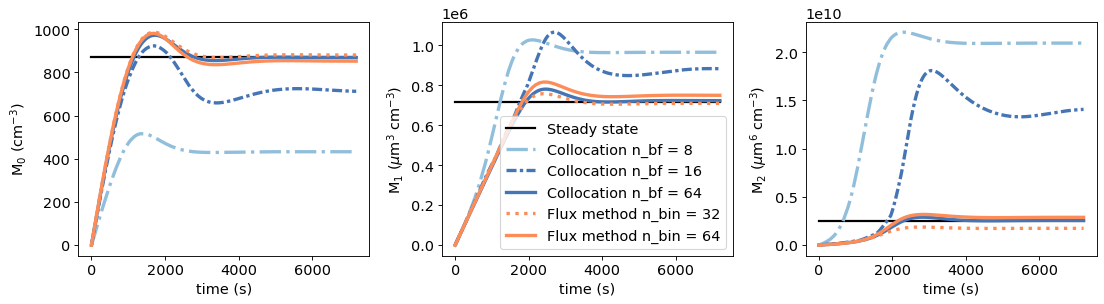

In [40]:
# plot all of them
pyplot.rcParams.update({'font.size':13})
colors = ['#000000','#91bfdb','#4575b4','#fc8d59','#d7191c']
ls = ['-','dashdot',(0, (3, 1, 1, 1)),'dotted','dashed']

fig, ax = pyplot.subplots(nrows=1, ncols=3, figsize=(14,4), dpi=80, facecolor='w', edgecolor='k')

# Steady State
t_inj = t_bott
mom_ss = rbf64_ss_mom(t_inj)
ax[0].plot(t_bott, mom_ss[0], '-', color='#000000', label='Steady state', linewidth=2)
ax[1].plot(t_bott, mom_ss[1], '-', color='#000000', label='Steady state', linewidth=2)
ax[2].plot(t_bott, mom_ss[2], '-', color='#000000', label='Steady state', linewidth=2)

# Collocation
ax[0].plot(col_8_times, col_8_M_0, linestyle=ls[1], color=colors[1], label='Collocation n_bf = 8',linewidth=3)
ax[1].plot(col_8_times, col_8_M_1, linestyle=ls[1], color=colors[1], label='Collocation n_bf = 8',linewidth=3)
ax[2].plot(col_8_times, col_8_M_2, linestyle=ls[1], color=colors[1], label='Collocation n_bf = 8',linewidth=3)

ax[0].plot(col_16_times, col_16_M_0, linestyle=ls[2], color=colors[2], label='Collocation n_bf = 16',linewidth=3)
ax[1].plot(col_16_times, col_16_M_1, linestyle=ls[2], color=colors[2], label='Collocation n_bf = 16',linewidth=3)
ax[2].plot(col_16_times, col_16_M_2, linestyle=ls[2], color=colors[2], label='Collocation n_bf = 16',linewidth=3)

ax[0].plot(col_64_times, col_64_M_0, linestyle=ls[0], color=colors[2], label='Collocation n_bf = 64',linewidth=3)
ax[1].plot(col_64_times, col_64_M_1, linestyle=ls[0], color=colors[2], label='Collocation n_bf = 64',linewidth=3)
ax[2].plot(col_64_times, col_64_M_2, linestyle=ls[0], color=colors[2], label='Collocation n_bf = 64',linewidth=3)

# BIN: (mg / cm^3) / mg
ax[0].plot(t_bott, M0_bott, linestyle=ls[3], color=colors[3], label='Flux method n_bin = 32',linewidth=3)
ax[1].plot(t_bott, M1_bott, linestyle=ls[3], color=colors[3], label='Flux method n_bin = 32',linewidth=3)
ax[2].plot(t_bott, M2_bott, linestyle=ls[3], color=colors[3], label='Flux method n_bin = 32',linewidth=3)

ax[0].plot(t_bott_HR, M0_bott_HR, linestyle=ls[0], color=colors[3], label='Flux method n_bin = 64',linewidth=3)
ax[1].plot(t_bott_HR, M1_bott_HR, linestyle=ls[0], color=colors[3], label='Flux method n_bin = 64',linewidth=3)
ax[2].plot(t_bott_HR, M2_bott_HR, linestyle=ls[0], color=colors[3], label='Flux method n_bin = 64',linewidth=3)


# # BULK: (um^3 / cm^3) / (um^3)
# ax[0].plot(t_cloudy, M0_cloudy, '-', color='#8B008B', label='MOM (3 moments)',linewidth=2)
# ax[1].plot(t_cloudy, M1_cloudy, '-', color='#8B008B', label='MOM (3 moments)',linewidth=2)
# ax[2].plot(t_cloudy, M2_cloudy, '-', color='#8B008B', label='MOM (3 moments)',linewidth=2)

ax[0].set_xlabel('time (s)')
ax[1].set_xlabel('time (s)')
ax[2].set_xlabel('time (s)')
ax[0].set_ylabel('M$_0$ (cm$^{-3}$)')
ax[1].set_ylabel('M$_1$ ($\mu$m$^3$ cm$^{-3}$)')
ax[2].set_ylabel('M$_2$ ($\mu$m$^6$ cm$^{-3}$)')
ax[1].legend(loc='best')
# ax[0].set_ylim([0, 40])
# ax[1].set_ylim([0, 2.5e5])
# ax[2].set_ylim([0, 4.5e9])
pyplot.tight_layout()
pyplot.savefig("moments_golovin_inject.pdf")


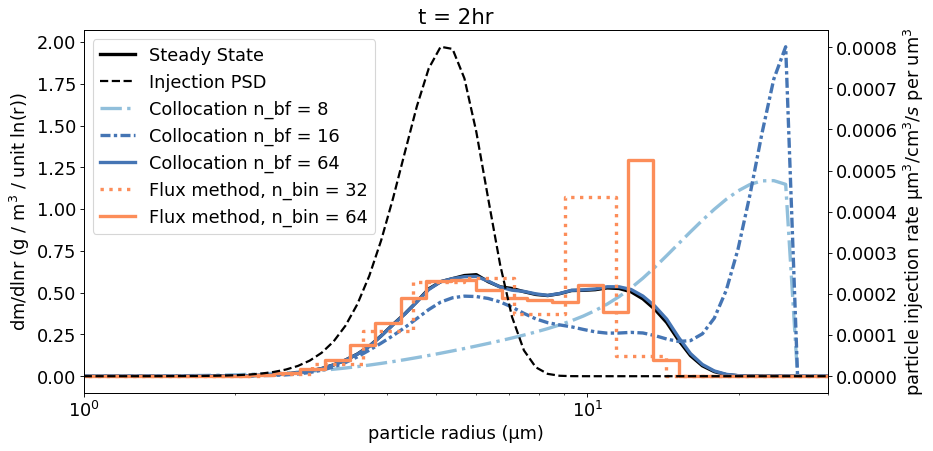

In [46]:
# plot all of them
pyplot.rcParams.update({'font.size':16})
colors = ['#000000','#91bfdb','#4575b4','#fc8d59','#d7191c']
ls = ['-','dashdot',(0, (3, 1, 1, 1)),'dotted','dashed']

fig, ax = pyplot.subplots(nrows=1, ncols=1, figsize=(12,6), dpi=80, facecolor='w', edgecolor='k')
ax2 = ax.twinx()

dx = np.diff(settings.volume_bins_edges[:] / si.um**3)
x = settings.volume_bins_edges[:-1]/si.um**3
r = (x / 4 * 3 / np.pi)**(1/3)

# steady state
y_ss = rbf64_ss(x)
ax.plot(r, 3*x*x*y_ss * 1e-6, linestyle=ls[0],color=colors[0], label='Steady State', linewidth=3)

# injection
yinject = mv_inject(x)
ax2.plot(r, yinject * 1e-6, linestyle='dashed', color=colors[0], label='Injection PSD', linewidth=2)
ax.plot(1.0, 0.0, linestyle='dashed', color=colors[0], label='Injection PSD', linewidth=2)

# COLLOCATION: (um^3 / cm^3) / (um^3)
yrbf8f = rbf8_f(x)
ax.plot(r, 3*x*x*yrbf8f * 1e-6, linestyle=ls[1],color=colors[1], label='Collocation n_bf = 8', linewidth=3)
yrbf16f = rbf16_f(x)
ax.plot(r, 3*x*x*yrbf16f * 1e-6, linestyle=ls[2],color=colors[2], label='Collocation n_bf = 16', linewidth=3)
yrbf64f = rbf64_f(x)
ax.plot(r, 3*x*x*yrbf64f * 1e-6, linestyle=ls[0],color=colors[2], label='Collocation n_bf = 64', linewidth=3)

# BIN: (mg / cm^3) / mg
ax.step(r_grid_plt, np.array(gr72) * 1e-6, linestyle=ls[3],color=colors[3], label='Flux method, n_bin = 32', linewidth=3)
ax.step(r_grid_pltHR, np.array(gr72HR) * 1e-6, linestyle=ls[0],color=colors[3], label='Flux method, n_bin = 64', linewidth=3)

# BULK: (um^3 / cm^3) / (um^3)
# ymomi = mom_i(x)
# ymomf = mom_f(x)
# pyplot.plot(x, x*ymomf, ':',color='#8B008B')#, label="MOM (3 moments), init")
# pyplot.plot(x, x*ymomf, '-',color='#8B008B', label="MOM (3 moments)")

pyplot.xscale('log')
ax.set_xlabel("particle radius (µm)")
ax.set_ylabel("dm/dlnr (g / m$^3$ / unit ln(r))")
ax2.set_ylabel("particle injection rate µm$^3$/cm$^3/s$ per um$^3$")
pyplot.xlim([1.0,30.0])
ax.legend()
pyplot.title('t = 2hr')
pyplot.savefig("m(v)_golovin_inject.pdf")